# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [3]:
project_data = pd.read_csv(r'C:\Users\ASUS\Downloads\Applied AI\Assignments - Applied AI\Assignment 3 -Apply K-NN DonorsChoose_2018\train_data.csv')
resource_data = pd.read_csv(r'C:\Users\ASUS\Downloads\Applied AI\Assignments - Applied AI\Assignment 3 -Apply K-NN DonorsChoose_2018\resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 Data Analysis

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


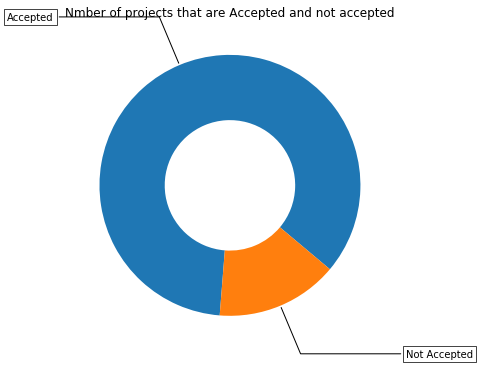

In [6]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

### 1.2.1 Univariate Analysis: School State

In [7]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

'''# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')
'''

'# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620\n\nscl = [[0.0, \'rgb(242,240,247)\'],[0.2, \'rgb(218,218,235)\'],[0.4, \'rgb(188,189,220)\'],            [0.6, \'rgb(158,154,200)\'],[0.8, \'rgb(117,107,177)\'],[1.0, \'rgb(84,39,143)\']]\n\ndata = [ dict(\n        type=\'choropleth\',\n        colorscale = scl,\n        autocolorscale = False,\n        locations = temp[\'state_code\'],\n        z = temp[\'num_proposals\'].astype(float),\n        locationmode = \'USA-states\',\n        text = temp[\'state_code\'],\n        marker = dict(line = dict (color = \'rgb(255,255,255)\',width = 2)),\n        colorbar = dict(title = "% of pro")\n    ) ]\n\nlayout = dict(\n        title = \'Project Proposals % of Acceptance Rate by US States\',\n        geo = dict(\n            scope=\'usa\',\n            projection=dict( type=\'albers usa\' ),\n            showlakes = True,\n            lakecolor = \'rgb(255, 255, 255)\',\n        ),\n    )\n\nfig = go.Figure(data=dat

In [8]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [9]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [10]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

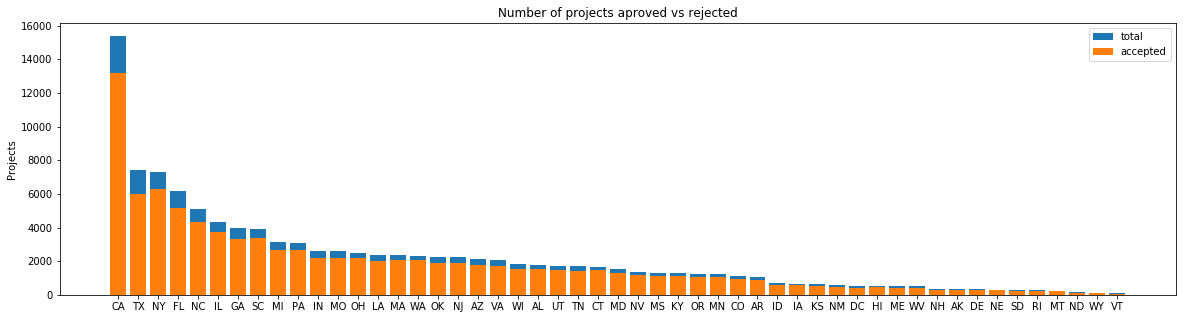

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [11]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__SUMMARY: Every state has greater than 80% success rate in approval__

### 1.2.2 Univariate Analysis: teacher_prefix

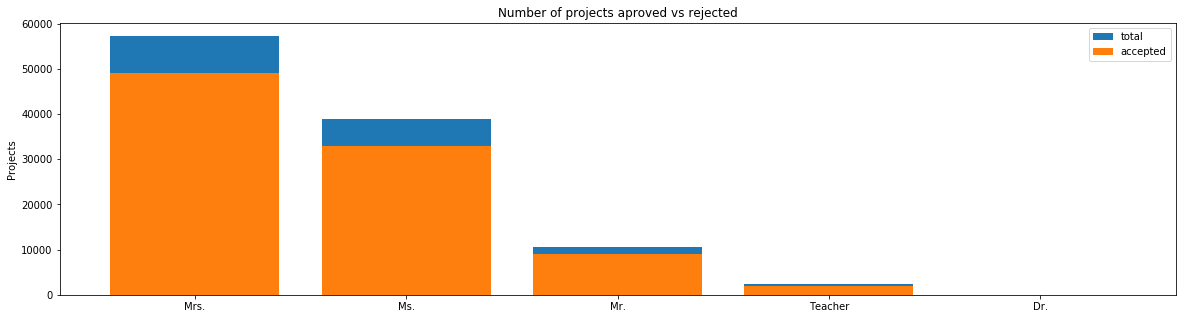

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [12]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

### 1.2.3 Univariate Analysis: project_grade_category

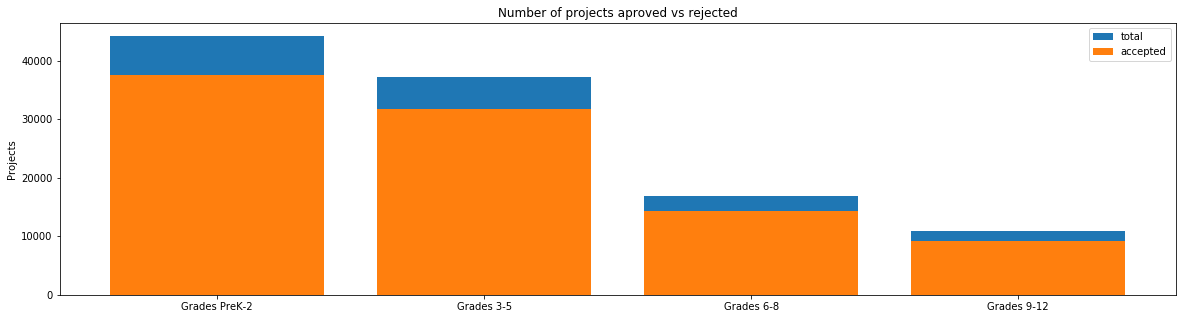

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [13]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### 1.2.4 Univariate Analysis: project_subject_categories

In [14]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [15]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

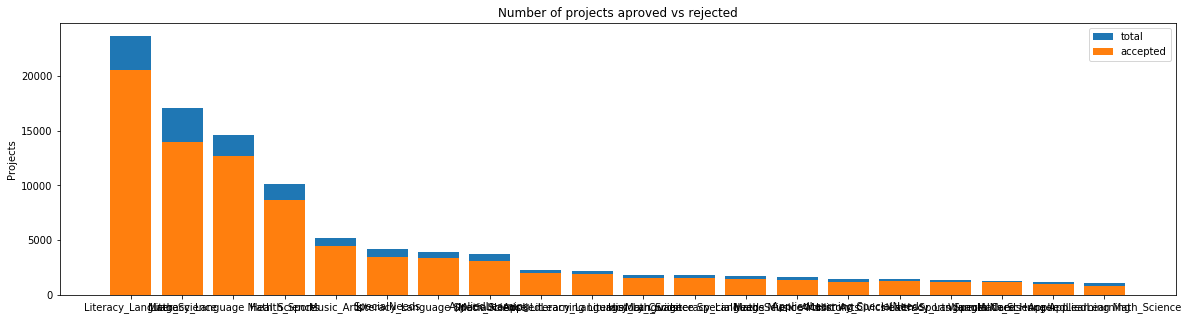

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [16]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [17]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

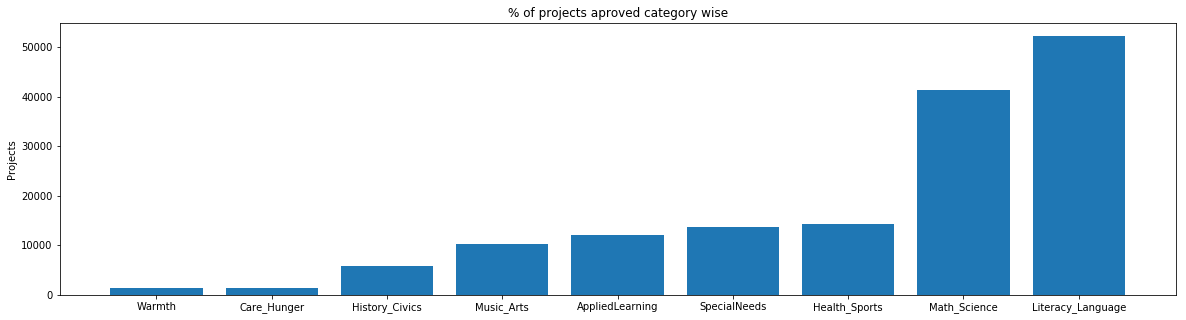

In [18]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [19]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [20]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [21]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

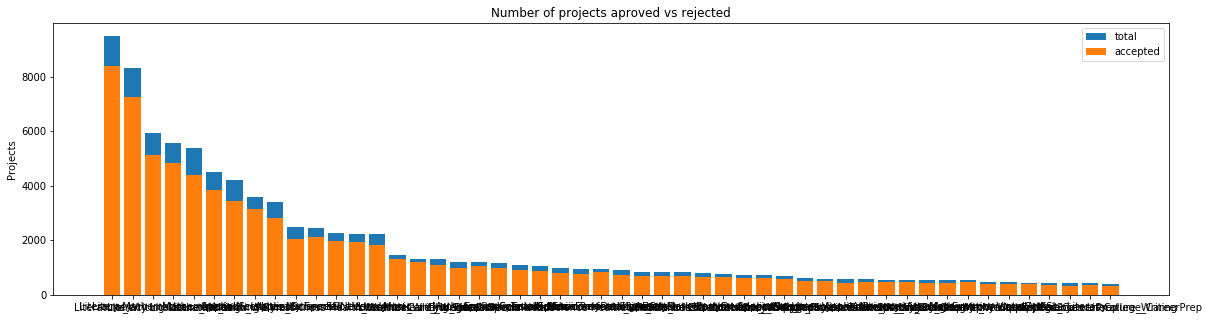

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [22]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [23]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

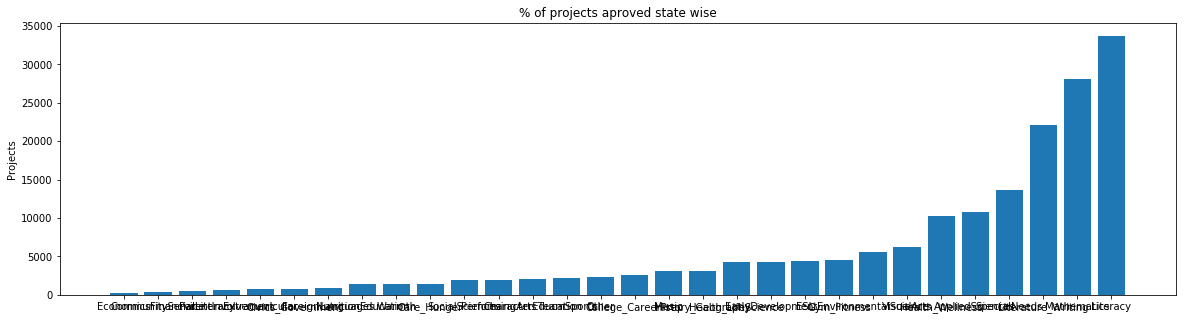

In [24]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [25]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### 1.2.6 Univariate Analysis: Text features (Title)

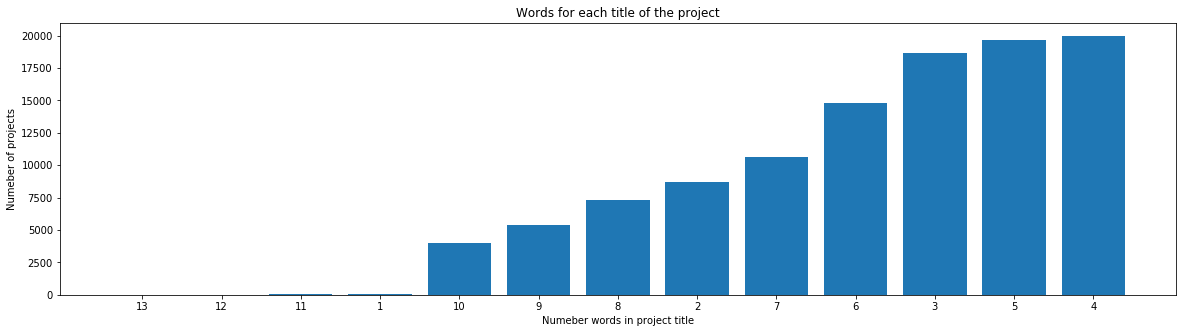

In [26]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [27]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

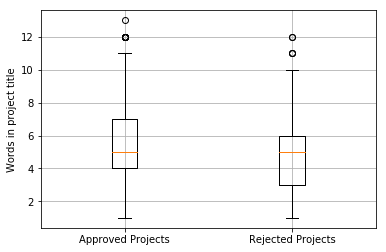

In [28]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

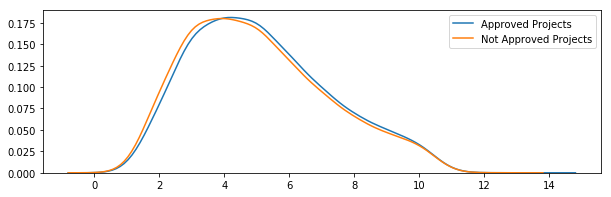

In [29]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [30]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [31]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

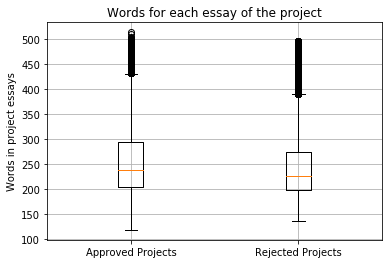

In [32]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

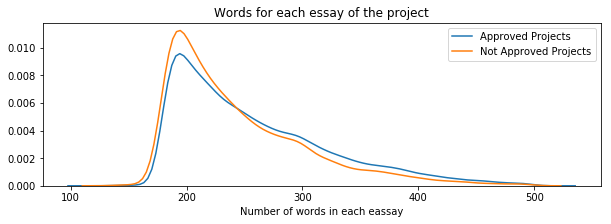

In [34]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### 1.2.8 Univariate Analysis: Cost per project

In [35]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [36]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [37]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [38]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

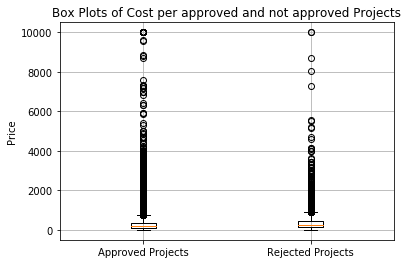

In [39]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

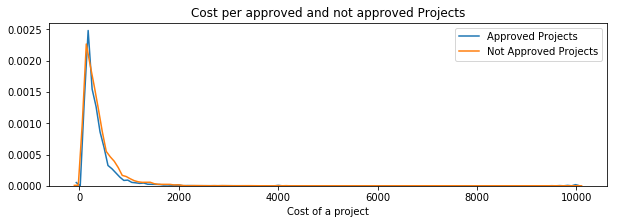

In [40]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [41]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

In [42]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

In [43]:
project_data['teacher_number_of_previously_posted_projects'].value_counts()

0      30014
1      16058
2      10350
3       7110
4       5266
5       4171
6       3404
7       2691
8       2293
9       1959
10      1644
11      1446
12      1335
13      1184
14       988
15       942
16       894
17       803
18       772
19       710
20       661
21       584
22       548
23       536
25       509
24       449
26       445
27       394
29       370
28       352
       ...  
219        1
333        1
282        1
281        1
270        1
406        1
341        1
404        1
335        1
339        1
338        1
293        1
394        1
294        1
362        1
326        1
365        1
428        1
364        1
236        1
274        1
234        1
266        1
425        1
361        1
296        1
329        1
359        1
422        1
235        1
Name: teacher_number_of_previously_posted_projects, Length: 374, dtype: int64

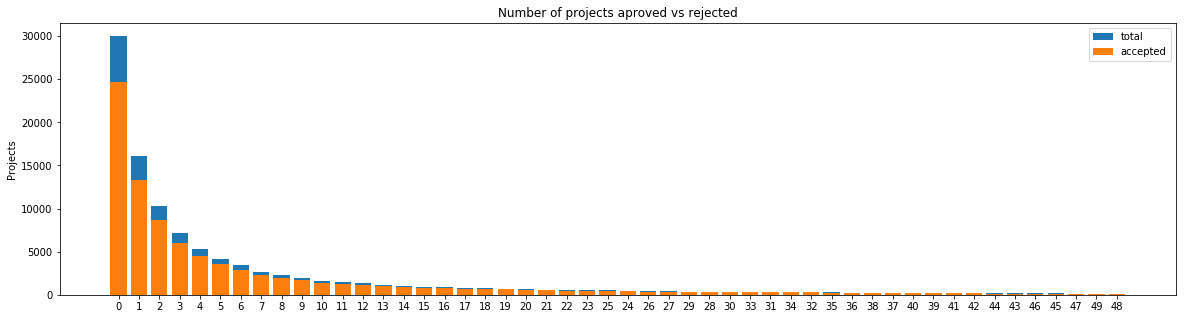

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                24652  30014   
1                                             1                13329  16058   
2                                             2                 8705  10350   
3                                             3                 5997   7110   
4                                             4                 4452   5266   

        Avg  
0  0.821350  
1  0.830054  
2  0.841063  
3  0.843460  
4  0.845423  
    teacher_number_of_previously_posted_projects  project_is_approved  total  \
46                                            46                  149    164   
45                                            45                  141    153   
47                                            47                  129    144   
49                                            49                  128    143   
48                                       

In [44]:
univariate_barplots(project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved', top=50)

In [45]:
approved_pre_posted_projects = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values

rejected_pre_posted_projects = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values

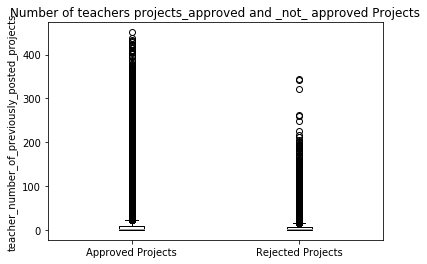

In [46]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_pre_posted_projects, rejected_pre_posted_projects])
plt.title('Number of teachers projects_approved and _not_ approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('teacher_number_of_previously_posted_projects')
plt.show()

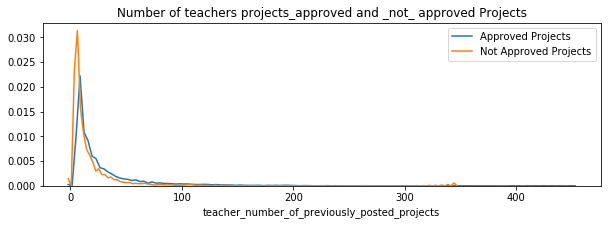

In [47]:
plt.figure(figsize=(10,3))
sns.distplot(approved_pre_posted_projects, hist=False, label="Approved Projects")
sns.distplot(rejected_pre_posted_projects, hist=False, label="Not Approved Projects")
plt.title('Number of teachers projects_approved and _not_ approved Projects')
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.legend()
plt.show()

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

Check if the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

In [48]:
project_data['project_resource_summary'].values

array(['My students need opportunities to practice beginning reading skills in English at home.',
       'My students need a projector to help with viewing educational programs',
       'My students need shine guards, athletic socks, Soccer Balls, goalie gloves, and training materials for the upcoming Soccer season.',
       ...,
       'My students need giant comfy pillows in order to help them relax and focus so that they can read and do their schoolwork on them. They also need calendar accessories to help them identify special events.',
       'My students need flexible seating options: bean bags, desk risers, lap desks and exercise balls!',
       'My students need opportunities to work with technology in order to become marketable 21st century citizens. These chromebooks will give them the chance to do just that.'],
      dtype=object)

In [49]:
def num_there(s):
    return any(i.isdigit() for i in s)

In [50]:
num_there('project_resource_summary')

False

In [51]:
# Python3 code to demonstrate 
# getting numbers from string  
# using List comprehension + isdigit() +split() 
  
# initializing string  
test_string = "There are 2 apples for 4 persons"
  
# printing original string  
print("The original string : " + test_string) 
  
# using List comprehension + isdigit() +split() 
# getting numbers from string  
res = [int(i) for i in test_string.split() if i.isdigit()] 
  
# print result 
print("The numbers list is : " + str(res)) 

The original string : There are 2 apples for 4 persons
The numbers list is : [2, 4]


In [52]:
def num_ther(data):
    return[int(i) for i in data.split() if i.isdigit()]

In [53]:
num_ther('project_resource_summary')

[]

In [54]:
#def num_the(data):
res = ''.join(filter(lambda i: i.isdigit(), project_data['project_resource_summary'])) 
print("The digits string is : " + str(res)) 

The digits string is : 


In [55]:
def unit_value(str):
    m = re.match(r'([^\d]*)(\d*\.?\d+)([^\d]*)', str)
    if m:
        g = m.groups()
        return ' '.join((g[0], g[2])).strip(), float(g[1])
    else:
        return int(str)

In [56]:
def get_num(x):
    return int(''.join(ele for ele in x if ele.isdigit()))

In [57]:
summary = []    #https://stackoverflow.com/questions/26825729/extract-number-from-string-in-python
line = list(project_data['project_resource_summary'].values)
for i in line:
    for j in i.split():
        try:
          summary.append(int(j))
        except ValueError:
            pass
print(summary)

[5, 2, 7, 2, 6, 5, 4, 2, 24, 2, 5, 60, 3, 2, 60, 10, 2, 2, 5, 5, 4, 5, 64, 64, 5, 20, 2, 4, 4, 4, 2, 2, 1, 500, 3, 12, 7, 5, 2, 8, 4, 4, 20, 5, 6, 5, 1, 3, 3, 2, 6, 21, 2016, 40, 5, 5, 4, 6, 5, 5, 6, 4, 5, 1, 2, 1, 1, 5, 6, 1, 1, 2, 3, 2, 5, 4, 30, 3, 5, 2, 2, 5, 3, 10, 14, 2, 4, 2, 2, 4, 60, 5, 5, 60, 5, 10, 3, 3, 5, 5, 155, 2, 3, 3, 5, 74, 3, 5, 30, 5, 60, 3, 10, 10, 2, 3, 5, 4, 10, 2, 15, 2016, 60, 9, 3, 10, 4, 3, 25, 4, 3, 40, 60, 2016, 8, 45, 12, 1, 2, 5, 6, 6, 3, 3, 8, 4, 72, 1, 10, 14, 16, 11, 4, 2, 6, 24, 2, 2, 1, 2, 2, 6, 4, 3, 3, 30, 100, 500, 288, 1, 35, 850, 13, 200, 28, 5, 2, 35, 20, 6, 7, 2, 2, 40, 5, 5, 25, 3, 3, 13, 30, 46, 4, 6, 1, 5, 12, 100, 2, 6, 18, 5, 4, 3, 4, 2, 1, 7, 8, 2, 28, 5, 10, 60, 90, 7, 2, 5, 4, 25, 25, 24, 6, 2, 220, 10, 3, 21, 5, 22, 25, 6, 5, 5, 20, 4, 1, 3, 4, 16, 2, 2, 5, 25, 10, 13, 13, 5, 2, 4, 2, 6, 8, 10, 15, 4, 2, 3, 6, 2, 2, 12, 10, 6, 7, 3, 2, 5, 2, 4, 6, 3, 110, 25, 10, 2, 2, 10, 40, 24, 3, 2, 2, 4, 30, 3, 11, 3, 2, 9, 6, 2, 40, 2, 3, 5, 5, 

In [58]:
len(summary)

14092

In [59]:
list_summary=[]
for word in project_data['project_resource_summary']:
    list_summary.append(word)

In [60]:
list_summary[0]

'My students need opportunities to practice beginning reading skills in English at home.'

In [61]:
list_summary[0].split()

['My',
 'students',
 'need',
 'opportunities',
 'to',
 'practice',
 'beginning',
 'reading',
 'skills',
 'in',
 'English',
 'at',
 'home.']

In [62]:
len(list_summary)

109248

In [63]:
#we are storing the values in dictionary as key and values
list_summary_dict={}
for l in range(len(list_summary)):
    for m in list_summary[l].split():
        if m.isdigit():
            list_summary_dict[l]=int(m)

In [64]:
len(list_summary_dict)

11237

In [65]:
list_summary_dict[21]

KeyError: 21

In [66]:
list_summary_dict[25]

KeyError: 25

In [67]:
list_summary_dict[0]

KeyError: 0

In [68]:
for k, v in list_summary_dict.items():  #https://stackoverflow.com/questions/26660654/how-do-i-print-the-key-value-pairs-of-a-dictionary-in-python/26660785
    print(k, v)

14 5
16 2
19 7
26 2
41 6
45 5
71 4
117 2
122 24
129 2
150 5
156 60
161 3
173 2
193 60
211 10
220 2
222 2
226 5
237 5
255 4
292 5
309 64
312 5
329 20
332 4
341 4
351 4
381 2
388 1
414 500
416 3
422 7
436 5
446 2
447 8
461 4
470 20
474 5
479 6
500 5
512 1
513 3
520 2
541 6
549 21
554 2016
568 40
572 5
580 5
583 6
620 5
634 6
655 4
669 5
671 1
681 1
688 5
703 1
706 2
722 3
729 2
731 5
757 4
771 30
779 3
791 5
793 2
808 2
820 5
838 3
840 10
849 14
852 2
859 60
861 5
870 5
876 60
879 5
884 10
905 3
916 5
918 155
922 2
926 3
929 5
946 74
955 3
963 5
964 5
967 60
981 3
984 10
1019 2
1024 3
1032 5
1041 4
1043 10
1062 2
1088 15
1102 2016
1105 60
1114 9
1120 3
1122 10
1137 4
1140 3
1142 25
1169 4
1183 3
1189 40
1191 60
1195 2016
1201 8
1207 45
1221 12
1227 1
1240 2
1251 5
1256 6
1261 6
1287 3
1301 3
1329 8
1337 4
1341 72
1343 1
1349 10
1364 14
1397 16
1403 11
1404 4
1405 2
1409 6
1413 24
1415 2
1437 1
1441 2
1442 2
1449 3
1460 3
1467 288
1468 1
1473 35
1486 850
1496 200
1497 28
1509 2
1510 35
15

11408 2017
11414 2
11415 4
11416 60
11422 5
11426 30
11433 30
11438 2
11445 3
11447 4
11455 5
11458 2
11461 1
11468 2
11485 60
11503 4
11512 30
11524 6
11535 3120
11553 2
11559 7
11567 8
11582 7
11598 5
11599 2
11606 4
11607 15
11611 6
11619 7
11620 15
11626 10
11643 6
11647 4
11653 6
11662 2
11668 3
11680 360
11683 30
11686 105
11708 2
11716 2
11721 2
11736 2
11743 4
11766 15
11791 5
11801 4
11835 8
11837 25
11856 1
11857 1
11858 31313
11860 2
11892 2
11906 18
11910 4
11912 3
11926 7
11936 8
11967 84
11985 3
11990 500
11997 24
11998 6
12002 4
12006 2
12017 6
12026 10
12036 1
12042 2
12045 10
12064 15
12066 5
12076 4
12086 1
12089 8
12090 6
12098 30
12111 2
12126 20
12128 10
12130 12
12135 25
12136 2
12141 2
12172 7
12188 2
12191 3
12196 10
12210 20
12249 4
12253 2
12266 4
12277 6
12282 8
12311 4
12318 3
12330 3
12336 6
12341 6
12377 3
12391 24
12394 5
12400 20
12416 4
12418 150
12433 5
12438 3
12448 14
12450 12
12464 5
12466 2
12482 4
12495 2016
12497 5
12501 6
12507 24
12520 4
12535 

20963 5
20964 6
20976 2
20977 65
20978 25
20988 2
21005 20
21013 4
21028 1
21034 42
21049 12
21054 5
21058 25
21068 50
21072 8
21105 2
21112 5
21148 3
21150 25
21152 2
21157 60
21167 5
21171 10
21187 3
21189 5
21201 206
21208 3
21217 7
21221 2
21236 60
21237 5
21239 20
21245 30
21248 5
21250 8
21252 2
21264 5
21265 1
21290 2
21297 2
21319 4
21322 9
21324 4
21335 4
21347 8710
21351 8
21358 5
21359 28
21369 12
21390 4
21391 4
21392 24
21407 4
21420 4
21434 7
21450 25
21462 2
21483 5
21521 24
21523 3
21538 6
21542 4
21543 10
21560 1
21561 10
21570 5
21578 3
21586 6
21588 5
21590 3120
21608 12
21618 5
21625 9
21628 4
21637 2
21639 100
21642 20
21644 200
21660 30
21666 6
21680 1
21697 30
21715 1
21734 10
21740 1
21761 98
21764 60
21769 5
21776 6
21815 360
21816 3
21817 5
21826 2
21827 23
21831 3
21845 2
21852 45300
21856 1
21862 28
21872 10
21881 12
21888 11
21894 6
21907 2
21914 4
21922 4
21926 25
21933 10
21941 6
21944 12
21949 1
21952 2
21955 150
21960 30
21977 23
21987 28
21991 5
21992 

30689 4
30694 120
30709 3
30715 104
30719 30
30749 2
30755 2
30761 3
30764 2
30771 4
30775 1307
30787 2
30797 72
30799 2
30801 8
30818 3120
30826 4
30863 30
30874 587
30884 1
30896 18
30899 4
30902 6
30909 4
30917 6
30925 30
30926 4
30944 4
30955 8
30968 6
30973 1
30975 360
30979 3
30982 2
30984 10
30993 2
30998 2
31008 22
31032 2017
31033 25
31044 4
31050 5
31055 4
31058 2
31059 30
31064 2
31066 1
31068 21
31071 18
31075 3
31076 6
31082 2
31093 365
31103 6
31119 5
31128 3
31159 180
31162 30
31166 2
31172 4
31176 3
31178 6
31200 2
31210 4
31232 2
31241 5
31257 5
31262 100
31263 2
31265 2
31269 2
31272 4
31285 25
31286 4
31287 5
31342 6
31354 2
31361 24
31363 15
31364 21
31375 60
31377 300
31388 4
31407 6
31444 100
31445 1
31457 45
31458 2
31474 5
31496 55
31517 5
31518 12
31539 3
31541 79
31546 4
31558 5
31570 12
31571 10
31578 20
31588 15
31629 2
31640 3
31653 2
31662 3
31666 40
31678 2
31691 5540
31697 360
31701 1
31707 510
31714 6
31715 6
31719 16
31745 12
31766 30
31769 9
31793 4
3

40493 3
40505 3
40518 1
40535 2
40538 2
40541 4
40546 6
40548 2
40550 5
40565 22
40573 3
40574 30
40578 16
40584 3
40599 100
40608 10
40626 4
40641 2
40642 6
40650 4
40655 8
40672 4
40682 2
40700 8
40709 5
40713 20
40736 2
40737 4
40759 10
40763 5
40767 3
40784 4
40805 8
40817 4
40822 8
40841 4
40860 5
40869 3
40870 3
40871 3
40880 4
40892 4
40896 2
40924 2
40926 2
40928 10
40929 2
40956 6
40958 1
40966 2
40976 12
40979 4
40980 10
40985 288
41018 3
41061 5
41063 50
41108 4
41119 1
41126 3
41132 5
41135 300
41153 4
41157 5
41163 3
41164 11
41170 30
41173 27
41182 6
41184 3
41200 6
41209 4
41212 5660
41219 5
41224 2
41227 8
41238 360
41241 2
41249 10
41251 4
41273 2
41278 7
41284 2
41286 2
41292 21
41294 18
41295 80
41304 3
41313 1
41330 72
41343 4
41348 2
41356 3
41357 36
41360 20
41368 11
41369 4
41394 10
41403 6
41436 5
41456 6
41459 30
41474 3
41477 42
41480 37
41504 16
41505 10
41523 3
41527 4
41535 10
41542 26
41545 2
41548 10
41554 7
41563 4
41566 60
41569 3
41570 10
41577 4
41606

49997 12
50000 27
50006 500
50010 32
50020 16
50023 8
50029 10
50032 20
50053 6
50116 1
50122 6
50124 6
50128 72
50138 80
50159 3
50170 5
50188 6
50190 5
50196 8
50207 4
50220 6
50238 4
50240 2
50243 6
50244 22
50253 6
50279 40
50319 7
50320 2
50345 2
50352 3
50364 6
50366 10
50373 34
50382 3
50395 14
50396 28
50436 2
50440 7
50448 27
50483 4
50494 3
50496 8
50502 3
50511 4
50523 2
50526 2
50541 600
50544 10
50556 4
50559 4
50573 4
50601 5
50625 30
50630 2
50672 3
50679 5
50690 5
50708 2
50722 2
50740 28
50743 3
50748 2
50759 4
50765 22
50800 4
50802 2
50809 2
50813 3
50816 4
50820 30
50829 5
50833 7
50839 4
50851 21
50856 2
50865 3
50876 2
50913 1
50918 1
50935 2
50956 20
50966 150
50974 100
50991 2
50992 4
51001 12
51025 89
51029 3
51035 5
51050 3
51052 3
51056 22
51057 1
51059 2
51064 8
51075 4
51085 3
51089 4
51091 4
51103 25
51113 601
51134 8
51136 12
51159 18
51182 8
51184 2
51207 12
51220 24
51225 50
51226 6
51230 5
51259 3
51262 6
51272 3
51275 100
51287 2
51289 6
51308 32
5131

59301 30
59314 3300
59315 4
59318 4
59320 4
59325 4
59337 5
59338 4
59355 12
59356 7
59402 10
59431 10
59434 11
59449 4
59450 70
59451 4
59471 3
59474 3
59475 2017
59506 8
59508 3
59516 3
59522 5
59529 1
59545 10
59566 5
59567 14
59575 5
59585 10
59586 6
59591 2
59601 1
59607 15
59619 5
59632 4
59634 1
59659 4
59662 8
59674 4
59687 3
59706 45
59714 3
59734 3120
59739 2
59742 30
59743 10
59748 10
59750 4
59756 5
59772 8
59778 6
59794 4
59802 2
59807 6
59813 5
59839 30
59848 5
59864 2
59880 100
59884 3
59888 3
59901 4
59907 2
59909 2
59914 2
59915 20
59917 1
59919 2
59924 7
59942 2
59946 6
59948 1
59970 10
59977 5
59987 1
60012 30
60023 2
60055 4
60060 5
60080 14
60086 80
60113 5
60125 1
60140 5
60141 6
60144 3
60177 8
60207 5
60211 16
60214 5
60218 5
60227 2
60230 40
60241 2
60273 2
60279 8710
60294 6
60296 30
60299 3
60304 2
60357 28
60359 10
60374 28
60375 2
60377 6
60379 115
60384 2
60388 60
60398 6
60416 14
60418 7
60426 6
60439 4
60451 1
60452 40
60461 4
60464 3
60476 32
60477 4
60

68658 5
68661 3
68681 4
68702 2
68704 16
68722 7
68744 100
68748 14
68761 6
68766 75
68774 7
68791 13
68800 2
68803 5
68833 2
68836 3
68843 17
68845 4
68873 4
68893 26
68894 16
68897 4
68914 6
68917 40
68922 30
68926 3
68931 12
68941 2
68942 2
68943 15
68966 8
68968 10
68986 10
69059 2
69070 100
69074 2
69080 4
69093 14
69096 30
69098 6
69103 4
69104 8
69135 23
69137 40
69144 15
69148 4
69153 8
69176 2
69180 7
69196 120
69204 3
69216 40
69219 360
69234 2
69246 60
69251 60
69255 4
69258 5
69259 1
69267 20
69290 2
69300 21
69330 5
69340 4
69346 6
69347 3
69350 5
69375 2
69386 35
69396 2
69402 8
69418 4
69421 5
69432 2
69433 2
69454 6
69467 30
69478 2
69497 4
69507 2
69510 1
69514 3
69517 25
69518 120
69519 1
69521 2
69523 30
69545 7
69549 2
69553 2
69557 2
69564 120
69572 27
69584 144
69591 12
69594 3
69598 30
69601 5
69603 100
69612 5
69615 5
69625 35
69633 8
69637 4
69638 30
69643 23
69644 35
69645 5
69655 3
69667 10
69676 4
69681 5
69694 4
69706 10
69711 6
69728 5
69736 10
69737 4
697

77993 2
77996 2
77999 2
78001 5
78005 4
78006 6
78007 2
78021 2
78046 30
78060 5
78074 5
78075 4
78090 6
78091 2
78095 20
78098 2
78103 12
78122 2
78126 5
78127 3
78131 5
78135 5
78150 84
78154 2
78166 10
78185 4
78186 5
78208 3
78225 4
78230 5
78233 25
78234 3
78238 2
78245 4
78248 10
78254 2
78261 3
78268 6
78272 60
78276 500
78284 7
78288 10
78292 2
78311 6
78320 10
78340 2017
78346 37
78349 4
78371 1
78389 5
78409 4
78411 5
78412 30
78417 7
78432 2
78437 4
78439 5
78460 13
78479 10
78482 7
78492 2
78499 5
78519 5
78526 1
78527 2
78541 8
78549 3
78557 10
78576 14
78596 30
78620 65
78622 2
78636 7
78656 6
78658 30
78709 2016
78734 8
78737 1
78742 20
78769 3
78777 3
78778 500
78790 40
78791 22
78802 2
78818 620
78832 1
78837 8
78842 5
78849 3
78851 4
78882 8
78885 3
78888 30
78892 3
78895 35
78915 7
78931 5
78934 3
78936 3
78943 2
78944 2
78948 2
78956 5
78964 5
78966 2
78983 4
78985 1
78986 15
79013 24
79017 8
79020 24
79022 2
79030 4
79037 3
79039 4
79040 5
79043 4
79054 6
79055 4
7

87271 20
87287 2
87290 5
87304 26
87324 4
87332 10
87334 4
87340 28
87341 2
87349 3
87352 4
87361 4
87374 3
87375 4
87393 3
87394 6
87400 2
87405 12
87417 3
87443 4
87454 5
87456 5
87458 2
87460 1
87470 6
87474 10
87475 27
87480 10
87482 10
87489 8
87491 5
87502 8
87519 100
87525 25
87529 4
87530 7
87551 5
87557 4
87563 2
87580 10
87596 5
87605 25
87625 6
87646 30
87650 6
87658 3
87670 7
87698 4
87702 3
87707 7
87720 2
87724 20
87758 2
87763 21
87765 2
87770 5
87776 3
87777 24
87781 2
87785 500
87824 75
87830 30
87835 5
87852 32
87856 2
87857 5
87859 4
87880 6
87901 2
87913 2
87916 60
87921 2
87939 5
87940 7
87944 10
87949 5
87983 3
88001 2
88011 4
88024 2
88036 5
88038 6
88041 4
88044 2
88058 27
88068 50
88073 2
88094 1
88096 3
88106 1
88122 40
88127 9
88132 30
88135 6
88149 5
88160 2016
88167 7
88184 2
88195 30
88200 4
88214 3
88225 14
88235 4
88244 2
88247 5
88257 39
88258 2
88260 2
88266 128
88292 360
88306 2
88330 10
88333 3
88336 1
88348 6
88350 4
88351 4
88362 5
88382 2
88399 40

96665 30
96669 46
96676 2
96678 3
96694 3
96700 23
96705 10
96712 2
96744 11
96749 60
96759 3
96761 11
96762 3
96764 6
96775 35
96778 3
96785 6
96795 5
96812 1
96825 60
96827 3
96831 10
96840 4
96848 2
96864 5
96884 12
96887 37
96890 8
96891 6
96918 8
96928 9
96947 4
96961 2
96997 4
97039 5
97055 3
97062 4
97072 2
97074 30
97081 2
97101 3
97103 2
97110 10
97119 2
97122 2
97138 3
97145 5
97151 3
97159 7
97170 5
97172 5
97178 15
97211 10
97218 4
97225 7
97235 15
97237 3
97247 5
97269 3
97280 4
97309 6
97314 5
97318 4
97319 4
97325 8
97334 5
97338 2
97343 85
97358 65
97362 5
97370 70
97375 20
97379 4
97380 2
97385 2
97387 4
97391 6
97397 3
97406 30
97417 3
97420 5
97423 67
97481 25
97485 1
97489 600
97493 10
97496 3
97505 2
97525 10
97528 10
97532 2
97552 100
97561 2
97571 30
97576 4
97582 2
97586 4
97595 4
97628 20
97651 4
97659 5
97663 2
97692 2
97694 2
97713 5
97720 80
97723 2
97734 1
97735 4
97751 15
97761 2
97800 2016
97803 2
97805 1
97808 11
97824 6
97828 15
97840 4
97848 2
97854 3


105283 60
105287 3
105289 60
105290 23
105295 2
105330 3
105357 2
105372 3
105391 6
105433 2
105434 3
105437 60
105442 6
105457 10
105460 6
105469 4
105472 4
105473 40
105478 7
105488 2
105490 5
105497 25
105508 2
105531 1
105533 5
105537 24
105546 2
105551 6
105559 7
105561 5
105570 2
105571 5
105579 2
105588 2
105597 25
105601 8
105618 900
105621 5
105627 3
105633 4
105665 3
105681 16
105684 4
105708 10
105711 2
105716 70
105718 14
105720 5
105723 4
105731 15
105734 12
105741 2
105746 2
105748 4
105751 4
105778 30
105801 30
105815 60
105828 8
105851 3
105854 60
105863 3
105869 6
105878 2
105884 7
105893 5
105951 2
105961 10
105963 1
105965 2
105971 4
105978 28
105990 1
105991 5
106000 5
106003 8
106004 12
106016 6
106018 2
106025 160
106042 5
106076 3
106089 7
106090 4
106096 30
106106 11
106117 4
106126 3
106133 2
106151 2
106155 36
106192 3
106217 3
106221 2
106231 2
106236 4
106237 2
106256 25
106264 2
106269 5
106270 10
106271 4
106314 1
106322 30
106325 3
106336 40
106342 3
1063

In [69]:
print(len(list_summary_dict))
list_summary_dict[14]

11237


5

In [70]:
list_summary_dict.keys()

dict_keys([14, 16, 19, 26, 41, 45, 71, 117, 122, 129, 150, 156, 161, 173, 193, 211, 220, 222, 226, 237, 255, 292, 309, 312, 329, 332, 341, 351, 381, 388, 414, 416, 422, 436, 446, 447, 461, 470, 474, 479, 500, 512, 513, 520, 541, 549, 554, 568, 572, 580, 583, 620, 634, 655, 669, 671, 681, 688, 703, 706, 722, 729, 731, 757, 771, 779, 791, 793, 808, 820, 838, 840, 849, 852, 859, 861, 870, 876, 879, 884, 905, 916, 918, 922, 926, 929, 946, 955, 963, 964, 967, 981, 984, 1019, 1024, 1032, 1041, 1043, 1062, 1088, 1102, 1105, 1114, 1120, 1122, 1137, 1140, 1142, 1169, 1183, 1189, 1191, 1195, 1201, 1207, 1221, 1227, 1240, 1251, 1256, 1261, 1287, 1301, 1329, 1337, 1341, 1343, 1349, 1364, 1397, 1403, 1404, 1405, 1409, 1413, 1415, 1437, 1441, 1442, 1449, 1460, 1467, 1468, 1473, 1486, 1496, 1497, 1509, 1510, 1528, 1544, 1545, 1562, 1570, 1588, 1589, 1601, 1613, 1619, 1621, 1624, 1626, 1629, 1669, 1671, 1672, 1705, 1722, 1742, 1748, 1755, 1765, 1771, 1772, 1796, 1857, 1865, 1866, 1881, 1913, 1960, 197

In [71]:
# we have already stored the numbers in dictionary
# now we need to make the non-numeric values as 0 and retains the numeric values as is

In [72]:
list_summary_dict_ = {}

for a in range(len(list_summary)) :
    if a in list_summary_dict.keys() :
        list_summary_dict_[a] = list_summary_dict[a]
    else :
        list_summary_dict_[a] = 0


In [73]:
print(len(list_summary_dict_))
list_summary_dict_[14]

109248


5

In [74]:
#https://stackoverflow.com/questions/26660654/how-do-i-print-the-key-value-pairs-of-a-dictionary-in-python/26660785
for k, v in list_summary_dict_.items(): 
    print(k, v)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 5
15 0
16 2
17 0
18 0
19 7
20 0
21 0
22 0
23 0
24 0
25 0
26 2
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 6
42 0
43 0
44 0
45 5
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 4
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 2
118 0
119 0
120 0
121 0
122 24
123 0
124 0
125 0
126 0
127 0
128 0
129 2
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 5
151 0
152 0
153 0
154 0
155 0
156 60
157 0
158 0
159 0
160 0
161 3
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 2
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 

1323 0
1324 0
1325 0
1326 0
1327 0
1328 0
1329 8
1330 0
1331 0
1332 0
1333 0
1334 0
1335 0
1336 0
1337 4
1338 0
1339 0
1340 0
1341 72
1342 0
1343 1
1344 0
1345 0
1346 0
1347 0
1348 0
1349 10
1350 0
1351 0
1352 0
1353 0
1354 0
1355 0
1356 0
1357 0
1358 0
1359 0
1360 0
1361 0
1362 0
1363 0
1364 14
1365 0
1366 0
1367 0
1368 0
1369 0
1370 0
1371 0
1372 0
1373 0
1374 0
1375 0
1376 0
1377 0
1378 0
1379 0
1380 0
1381 0
1382 0
1383 0
1384 0
1385 0
1386 0
1387 0
1388 0
1389 0
1390 0
1391 0
1392 0
1393 0
1394 0
1395 0
1396 0
1397 16
1398 0
1399 0
1400 0
1401 0
1402 0
1403 11
1404 4
1405 2
1406 0
1407 0
1408 0
1409 6
1410 0
1411 0
1412 0
1413 24
1414 0
1415 2
1416 0
1417 0
1418 0
1419 0
1420 0
1421 0
1422 0
1423 0
1424 0
1425 0
1426 0
1427 0
1428 0
1429 0
1430 0
1431 0
1432 0
1433 0
1434 0
1435 0
1436 0
1437 1
1438 0
1439 0
1440 0
1441 2
1442 2
1443 0
1444 0
1445 0
1446 0
1447 0
1448 0
1449 3
1450 0
1451 0
1452 0
1453 0
1454 0
1455 0
1456 0
1457 0
1458 0
1459 0
1460 3
1461 0
1462 0
1463 0
1464 0


2486 0
2487 0
2488 0
2489 0
2490 0
2491 6
2492 0
2493 0
2494 2
2495 40
2496 0
2497 0
2498 0
2499 0
2500 0
2501 0
2502 0
2503 0
2504 2
2505 3
2506 0
2507 0
2508 0
2509 5
2510 0
2511 0
2512 0
2513 0
2514 0
2515 0
2516 0
2517 0
2518 0
2519 0
2520 0
2521 0
2522 0
2523 0
2524 0
2525 5
2526 0
2527 60
2528 0
2529 0
2530 0
2531 0
2532 0
2533 0
2534 5
2535 0
2536 0
2537 6
2538 0
2539 0
2540 0
2541 0
2542 0
2543 0
2544 0
2545 0
2546 0
2547 0
2548 0
2549 0
2550 0
2551 0
2552 0
2553 6
2554 0
2555 0
2556 0
2557 0
2558 0
2559 0
2560 0
2561 0
2562 0
2563 0
2564 0
2565 0
2566 0
2567 0
2568 0
2569 0
2570 0
2571 0
2572 0
2573 0
2574 0
2575 0
2576 0
2577 0
2578 0
2579 2
2580 0
2581 0
2582 0
2583 0
2584 0
2585 0
2586 0
2587 0
2588 0
2589 0
2590 0
2591 0
2592 0
2593 0
2594 0
2595 0
2596 0
2597 0
2598 0
2599 0
2600 0
2601 0
2602 0
2603 0
2604 300
2605 0
2606 0
2607 0
2608 0
2609 4
2610 0
2611 0
2612 0
2613 0
2614 0
2615 0
2616 0
2617 0
2618 2
2619 0
2620 0
2621 0
2622 2
2623 0
2624 0
2625 37
2626 0
2627 0
2

3649 0
3650 0
3651 0
3652 0
3653 0
3654 0
3655 0
3656 0
3657 0
3658 0
3659 0
3660 4
3661 0
3662 0
3663 0
3664 0
3665 5
3666 0
3667 0
3668 0
3669 0
3670 0
3671 0
3672 0
3673 0
3674 0
3675 0
3676 0
3677 0
3678 0
3679 0
3680 0
3681 0
3682 0
3683 10
3684 0
3685 0
3686 0
3687 0
3688 0
3689 0
3690 0
3691 4
3692 0
3693 0
3694 0
3695 0
3696 0
3697 2
3698 0
3699 0
3700 0
3701 40
3702 0
3703 0
3704 6
3705 0
3706 0
3707 0
3708 0
3709 0
3710 0
3711 0
3712 2016
3713 0
3714 0
3715 0
3716 0
3717 0
3718 0
3719 0
3720 0
3721 0
3722 0
3723 0
3724 0
3725 0
3726 0
3727 0
3728 0
3729 0
3730 3
3731 10
3732 0
3733 0
3734 0
3735 0
3736 0
3737 0
3738 0
3739 0
3740 0
3741 0
3742 0
3743 0
3744 0
3745 0
3746 0
3747 0
3748 0
3749 360
3750 0
3751 0
3752 0
3753 0
3754 0
3755 0
3756 0
3757 0
3758 0
3759 0
3760 0
3761 0
3762 0
3763 0
3764 0
3765 0
3766 0
3767 0
3768 0
3769 0
3770 2
3771 0
3772 0
3773 0
3774 0
3775 0
3776 0
3777 0
3778 0
3779 0
3780 0
3781 0
3782 0
3783 0
3784 0
3785 0
3786 0
3787 0
3788 0
3789 0
3790 

4812 16
4813 0
4814 5
4815 0
4816 0
4817 0
4818 0
4819 0
4820 0
4821 3
4822 0
4823 0
4824 0
4825 0
4826 0
4827 0
4828 6
4829 0
4830 0
4831 0
4832 0
4833 0
4834 0
4835 0
4836 0
4837 0
4838 0
4839 0
4840 0
4841 7
4842 0
4843 0
4844 0
4845 0
4846 0
4847 0
4848 3
4849 0
4850 0
4851 0
4852 0
4853 0
4854 0
4855 0
4856 30
4857 0
4858 0
4859 0
4860 0
4861 0
4862 0
4863 0
4864 0
4865 0
4866 0
4867 0
4868 0
4869 0
4870 0
4871 0
4872 0
4873 0
4874 0
4875 0
4876 0
4877 0
4878 0
4879 0
4880 0
4881 0
4882 0
4883 0
4884 0
4885 0
4886 0
4887 0
4888 0
4889 6
4890 0
4891 0
4892 4
4893 0
4894 4
4895 360
4896 0
4897 0
4898 0
4899 0
4900 0
4901 10
4902 0
4903 0
4904 0
4905 3
4906 0
4907 0
4908 0
4909 0
4910 0
4911 24
4912 0
4913 0
4914 0
4915 0
4916 0
4917 0
4918 0
4919 0
4920 0
4921 0
4922 0
4923 0
4924 0
4925 0
4926 0
4927 0
4928 0
4929 4
4930 0
4931 0
4932 0
4933 0
4934 0
4935 0
4936 0
4937 4
4938 0
4939 0
4940 0
4941 0
4942 0
4943 3
4944 0
4945 0
4946 0
4947 0
4948 0
4949 0
4950 0
4951 0
4952 0
4953 0


5976 0
5977 0
5978 0
5979 0
5980 0
5981 0
5982 0
5983 30
5984 0
5985 0
5986 4
5987 0
5988 0
5989 0
5990 0
5991 0
5992 0
5993 5
5994 0
5995 0
5996 0
5997 0
5998 0
5999 0
6000 0
6001 0
6002 0
6003 3
6004 0
6005 100
6006 0
6007 0
6008 0
6009 0
6010 0
6011 0
6012 0
6013 0
6014 0
6015 0
6016 0
6017 30
6018 0
6019 0
6020 0
6021 0
6022 0
6023 0
6024 30
6025 0
6026 0
6027 0
6028 0
6029 0
6030 0
6031 3
6032 0
6033 0
6034 0
6035 0
6036 5
6037 0
6038 0
6039 0
6040 0
6041 0
6042 0
6043 0
6044 0
6045 0
6046 0
6047 0
6048 0
6049 6
6050 0
6051 0
6052 0
6053 0
6054 0
6055 0
6056 0
6057 0
6058 0
6059 0
6060 0
6061 0
6062 0
6063 0
6064 0
6065 0
6066 0
6067 2
6068 0
6069 0
6070 0
6071 0
6072 0
6073 0
6074 0
6075 0
6076 0
6077 0
6078 0
6079 0
6080 0
6081 0
6082 0
6083 0
6084 0
6085 52
6086 0
6087 0
6088 0
6089 0
6090 0
6091 0
6092 0
6093 0
6094 2
6095 0
6096 0
6097 6
6098 0
6099 0
6100 0
6101 0
6102 0
6103 0
6104 0
6105 30
6106 0
6107 0
6108 0
6109 60
6110 0
6111 0
6112 0
6113 0
6114 0
6115 0
6116 0
6117 

7138 0
7139 0
7140 0
7141 0
7142 0
7143 0
7144 0
7145 0
7146 0
7147 0
7148 0
7149 4
7150 0
7151 0
7152 0
7153 0
7154 14
7155 0
7156 0
7157 0
7158 0
7159 0
7160 0
7161 0
7162 0
7163 0
7164 0
7165 0
7166 0
7167 0
7168 0
7169 132
7170 0
7171 0
7172 60
7173 0
7174 0
7175 0
7176 0
7177 0
7178 0
7179 0
7180 3
7181 0
7182 0
7183 0
7184 28
7185 2
7186 0
7187 0
7188 0
7189 0
7190 0
7191 17
7192 0
7193 0
7194 0
7195 0
7196 0
7197 0
7198 3
7199 4
7200 0
7201 0
7202 0
7203 0
7204 3
7205 0
7206 0
7207 0
7208 0
7209 0
7210 2
7211 0
7212 0
7213 4
7214 0
7215 0
7216 0
7217 0
7218 0
7219 0
7220 11
7221 5
7222 0
7223 0
7224 0
7225 0
7226 0
7227 0
7228 0
7229 0
7230 0
7231 0
7232 0
7233 0
7234 0
7235 0
7236 20
7237 0
7238 0
7239 0
7240 0
7241 0
7242 0
7243 0
7244 0
7245 0
7246 0
7247 0
7248 0
7249 0
7250 0
7251 0
7252 0
7253 0
7254 0
7255 0
7256 0
7257 0
7258 0
7259 0
7260 0
7261 0
7262 0
7263 0
7264 0
7265 0
7266 0
7267 180
7268 0
7269 0
7270 0
7271 0
7272 0
7273 0
7274 0
7275 0
7276 0
7277 0
7278 0
727

8299 0
8300 0
8301 0
8302 0
8303 0
8304 0
8305 0
8306 0
8307 0
8308 0
8309 0
8310 0
8311 0
8312 0
8313 0
8314 0
8315 25
8316 0
8317 0
8318 0
8319 0
8320 0
8321 0
8322 0
8323 0
8324 0
8325 0
8326 0
8327 0
8328 0
8329 4
8330 72
8331 5
8332 0
8333 0
8334 0
8335 0
8336 0
8337 10
8338 0
8339 0
8340 0
8341 0
8342 0
8343 0
8344 0
8345 0
8346 0
8347 0
8348 0
8349 0
8350 0
8351 0
8352 0
8353 0
8354 2
8355 0
8356 0
8357 0
8358 0
8359 0
8360 0
8361 0
8362 0
8363 0
8364 0
8365 0
8366 0
8367 0
8368 0
8369 0
8370 0
8371 0
8372 0
8373 0
8374 0
8375 0
8376 0
8377 0
8378 0
8379 0
8380 0
8381 0
8382 30
8383 0
8384 4
8385 0
8386 0
8387 0
8388 0
8389 0
8390 0
8391 0
8392 0
8393 0
8394 0
8395 0
8396 0
8397 0
8398 0
8399 0
8400 0
8401 0
8402 0
8403 0
8404 0
8405 0
8406 0
8407 10
8408 0
8409 0
8410 0
8411 4
8412 0
8413 0
8414 0
8415 0
8416 0
8417 0
8418 0
8419 0
8420 0
8421 0
8422 2
8423 2
8424 2
8425 0
8426 0
8427 0
8428 30
8429 0
8430 3
8431 0
8432 4
8433 0
8434 0
8435 0
8436 7
8437 0
8438 0
8439 0
8440 0


9464 0
9465 0
9466 0
9467 0
9468 0
9469 0
9470 0
9471 0
9472 0
9473 0
9474 0
9475 3
9476 0
9477 0
9478 0
9479 0
9480 0
9481 0
9482 0
9483 0
9484 0
9485 0
9486 0
9487 0
9488 0
9489 0
9490 0
9491 4
9492 0
9493 0
9494 0
9495 0
9496 0
9497 0
9498 0
9499 0
9500 0
9501 0
9502 0
9503 0
9504 0
9505 0
9506 0
9507 0
9508 0
9509 0
9510 0
9511 0
9512 5
9513 0
9514 0
9515 0
9516 0
9517 0
9518 0
9519 0
9520 0
9521 0
9522 0
9523 0
9524 0
9525 0
9526 0
9527 0
9528 0
9529 0
9530 0
9531 0
9532 0
9533 0
9534 0
9535 0
9536 0
9537 0
9538 0
9539 0
9540 0
9541 0
9542 0
9543 0
9544 0
9545 0
9546 0
9547 0
9548 0
9549 0
9550 0
9551 0
9552 0
9553 0
9554 0
9555 0
9556 0
9557 0
9558 0
9559 0
9560 0
9561 0
9562 0
9563 0
9564 0
9565 0
9566 0
9567 504
9568 0
9569 0
9570 0
9571 0
9572 0
9573 0
9574 0
9575 0
9576 2
9577 0
9578 0
9579 0
9580 2
9581 0
9582 0
9583 0
9584 0
9585 0
9586 0
9587 0
9588 0
9589 17
9590 0
9591 0
9592 0
9593 0
9594 32
9595 0
9596 0
9597 4
9598 0
9599 0
9600 0
9601 0
9602 0
9603 0
9604 9
9605 0
96

10549 0
10550 0
10551 0
10552 0
10553 0
10554 0
10555 0
10556 0
10557 0
10558 0
10559 0
10560 0
10561 0
10562 0
10563 0
10564 0
10565 0
10566 0
10567 0
10568 0
10569 0
10570 0
10571 3
10572 0
10573 0
10574 0
10575 0
10576 0
10577 0
10578 0
10579 0
10580 0
10581 0
10582 4
10583 0
10584 0
10585 0
10586 0
10587 0
10588 0
10589 0
10590 0
10591 0
10592 0
10593 18
10594 0
10595 0
10596 3
10597 0
10598 0
10599 0
10600 0
10601 4
10602 0
10603 0
10604 0
10605 30
10606 0
10607 0
10608 0
10609 0
10610 0
10611 0
10612 0
10613 0
10614 30
10615 0
10616 0
10617 0
10618 0
10619 0
10620 0
10621 0
10622 0
10623 0
10624 0
10625 0
10626 0
10627 0
10628 2
10629 5
10630 2
10631 0
10632 0
10633 0
10634 0
10635 4
10636 0
10637 7
10638 0
10639 0
10640 0
10641 0
10642 0
10643 0
10644 0
10645 0
10646 4
10647 0
10648 0
10649 4
10650 0
10651 0
10652 0
10653 0
10654 0
10655 0
10656 0
10657 6
10658 0
10659 0
10660 2
10661 0
10662 0
10663 0
10664 0
10665 0
10666 0
10667 0
10668 0
10669 0
10670 0
10671 0
10672 0
10673

11568 0
11569 0
11570 0
11571 0
11572 0
11573 0
11574 0
11575 0
11576 0
11577 0
11578 0
11579 0
11580 0
11581 0
11582 7
11583 0
11584 0
11585 0
11586 0
11587 0
11588 0
11589 0
11590 0
11591 0
11592 0
11593 0
11594 0
11595 0
11596 0
11597 0
11598 5
11599 2
11600 0
11601 0
11602 0
11603 0
11604 0
11605 0
11606 4
11607 15
11608 0
11609 0
11610 0
11611 6
11612 0
11613 0
11614 0
11615 0
11616 0
11617 0
11618 0
11619 7
11620 15
11621 0
11622 0
11623 0
11624 0
11625 0
11626 10
11627 0
11628 0
11629 0
11630 0
11631 0
11632 0
11633 0
11634 0
11635 0
11636 0
11637 0
11638 0
11639 0
11640 0
11641 0
11642 0
11643 6
11644 0
11645 0
11646 0
11647 4
11648 0
11649 0
11650 0
11651 0
11652 0
11653 6
11654 0
11655 0
11656 0
11657 0
11658 0
11659 0
11660 0
11661 0
11662 2
11663 0
11664 0
11665 0
11666 0
11667 0
11668 3
11669 0
11670 0
11671 0
11672 0
11673 0
11674 0
11675 0
11676 0
11677 0
11678 0
11679 0
11680 360
11681 0
11682 0
11683 30
11684 0
11685 0
11686 105
11687 0
11688 0
11689 0
11690 0
11691 0


12587 0
12588 0
12589 0
12590 0
12591 6
12592 0
12593 0
12594 0
12595 1
12596 0
12597 0
12598 0
12599 0
12600 0
12601 0
12602 0
12603 0
12604 0
12605 0
12606 0
12607 0
12608 0
12609 0
12610 0
12611 0
12612 10
12613 0
12614 0
12615 0
12616 0
12617 0
12618 0
12619 0
12620 0
12621 0
12622 0
12623 4
12624 0
12625 0
12626 0
12627 0
12628 0
12629 0
12630 0
12631 0
12632 0
12633 0
12634 0
12635 0
12636 0
12637 0
12638 0
12639 0
12640 0
12641 6
12642 2
12643 0
12644 0
12645 0
12646 5
12647 0
12648 0
12649 0
12650 0
12651 0
12652 256
12653 0
12654 0
12655 0
12656 0
12657 4
12658 0
12659 0
12660 0
12661 2
12662 0
12663 0
12664 0
12665 0
12666 0
12667 0
12668 0
12669 0
12670 0
12671 0
12672 0
12673 0
12674 0
12675 0
12676 0
12677 0
12678 0
12679 0
12680 0
12681 0
12682 0
12683 0
12684 0
12685 0
12686 0
12687 10
12688 0
12689 4
12690 0
12691 0
12692 0
12693 0
12694 0
12695 0
12696 0
12697 3
12698 0
12699 0
12700 0
12701 0
12702 0
12703 0
12704 0
12705 0
12706 0
12707 0
12708 0
12709 4
12710 0
1271

13605 10
13606 0
13607 0
13608 0
13609 0
13610 0
13611 0
13612 0
13613 0
13614 0
13615 0
13616 0
13617 0
13618 0
13619 0
13620 0
13621 0
13622 0
13623 0
13624 0
13625 15
13626 0
13627 0
13628 0
13629 0
13630 0
13631 0
13632 0
13633 0
13634 10
13635 0
13636 0
13637 0
13638 0
13639 0
13640 0
13641 0
13642 0
13643 0
13644 4
13645 0
13646 0
13647 0
13648 0
13649 0
13650 0
13651 0
13652 0
13653 0
13654 0
13655 0
13656 0
13657 3
13658 0
13659 0
13660 0
13661 5
13662 0
13663 0
13664 0
13665 0
13666 2
13667 0
13668 0
13669 4
13670 0
13671 0
13672 0
13673 0
13674 0
13675 0
13676 0
13677 0
13678 0
13679 0
13680 0
13681 0
13682 0
13683 0
13684 2
13685 0
13686 0
13687 0
13688 7640
13689 0
13690 0
13691 0
13692 0
13693 0
13694 0
13695 0
13696 5
13697 0
13698 0
13699 0
13700 0
13701 0
13702 0
13703 0
13704 0
13705 0
13706 0
13707 0
13708 5
13709 5
13710 0
13711 0
13712 0
13713 0
13714 0
13715 0
13716 0
13717 0
13718 7
13719 0
13720 0
13721 0
13722 0
13723 0
13724 0
13725 0
13726 0
13727 0
13728 0
13

14623 0
14624 0
14625 0
14626 0
14627 0
14628 0
14629 0
14630 0
14631 0
14632 0
14633 0
14634 0
14635 3
14636 0
14637 0
14638 0
14639 0
14640 0
14641 0
14642 0
14643 4
14644 0
14645 0
14646 0
14647 0
14648 0
14649 3200
14650 0
14651 0
14652 0
14653 84
14654 2
14655 0
14656 0
14657 0
14658 0
14659 0
14660 0
14661 0
14662 0
14663 0
14664 0
14665 0
14666 0
14667 0
14668 0
14669 0
14670 0
14671 0
14672 0
14673 0
14674 0
14675 2
14676 0
14677 0
14678 0
14679 0
14680 0
14681 0
14682 0
14683 0
14684 0
14685 0
14686 0
14687 0
14688 10
14689 0
14690 0
14691 0
14692 0
14693 0
14694 0
14695 0
14696 0
14697 0
14698 0
14699 0
14700 1
14701 0
14702 0
14703 0
14704 0
14705 0
14706 0
14707 0
14708 0
14709 0
14710 0
14711 0
14712 22
14713 0
14714 0
14715 0
14716 0
14717 0
14718 0
14719 0
14720 0
14721 4
14722 0
14723 0
14724 0
14725 0
14726 0
14727 0
14728 0
14729 0
14730 0
14731 0
14732 0
14733 0
14734 0
14735 0
14736 0
14737 0
14738 0
14739 0
14740 4
14741 0
14742 0
14743 0
14744 0
14745 0
14746 40
1

15640 0
15641 0
15642 0
15643 0
15644 2
15645 0
15646 0
15647 2
15648 0
15649 0
15650 20
15651 0
15652 0
15653 5
15654 0
15655 0
15656 0
15657 0
15658 4
15659 0
15660 0
15661 0
15662 0
15663 0
15664 0
15665 0
15666 0
15667 60
15668 0
15669 5
15670 0
15671 0
15672 0
15673 0
15674 0
15675 0
15676 0
15677 0
15678 4
15679 0
15680 0
15681 0
15682 0
15683 0
15684 0
15685 0
15686 0
15687 0
15688 16
15689 0
15690 0
15691 0
15692 0
15693 0
15694 0
15695 0
15696 0
15697 0
15698 6
15699 0
15700 0
15701 0
15702 0
15703 0
15704 0
15705 0
15706 0
15707 0
15708 0
15709 0
15710 0
15711 0
15712 0
15713 0
15714 0
15715 0
15716 0
15717 0
15718 0
15719 0
15720 0
15721 0
15722 0
15723 0
15724 0
15725 0
15726 0
15727 0
15728 0
15729 0
15730 0
15731 2
15732 0
15733 0
15734 0
15735 2
15736 0
15737 0
15738 0
15739 0
15740 0
15741 0
15742 0
15743 1
15744 0
15745 0
15746 0
15747 0
15748 0
15749 0
15750 0
15751 0
15752 0
15753 0
15754 0
15755 0
15756 4
15757 0
15758 4
15759 0
15760 0
15761 0
15762 0
15763 0
15764

16660 0
16661 3
16662 0
16663 0
16664 0
16665 0
16666 0
16667 0
16668 0
16669 0
16670 0
16671 0
16672 0
16673 0
16674 0
16675 0
16676 0
16677 6
16678 0
16679 0
16680 0
16681 0
16682 0
16683 0
16684 9
16685 0
16686 0
16687 0
16688 0
16689 0
16690 0
16691 0
16692 0
16693 0
16694 0
16695 0
16696 0
16697 0
16698 0
16699 0
16700 0
16701 0
16702 0
16703 0
16704 0
16705 0
16706 4
16707 0
16708 0
16709 0
16710 0
16711 0
16712 0
16713 0
16714 0
16715 0
16716 0
16717 0
16718 10
16719 0
16720 0
16721 0
16722 0
16723 0
16724 0
16725 10
16726 0
16727 0
16728 0
16729 0
16730 0
16731 0
16732 0
16733 0
16734 0
16735 0
16736 0
16737 0
16738 5
16739 0
16740 0
16741 0
16742 0
16743 0
16744 0
16745 2
16746 0
16747 0
16748 0
16749 0
16750 0
16751 0
16752 0
16753 0
16754 0
16755 0
16756 0
16757 0
16758 0
16759 0
16760 0
16761 0
16762 0
16763 0
16764 0
16765 0
16766 0
16767 0
16768 0
16769 0
16770 0
16771 0
16772 0
16773 0
16774 0
16775 0
16776 3
16777 0
16778 0
16779 0
16780 0
16781 0
16782 0
16783 0
16784 

17680 0
17681 0
17682 0
17683 0
17684 0
17685 0
17686 0
17687 0
17688 5
17689 0
17690 0
17691 0
17692 0
17693 0
17694 0
17695 0
17696 0
17697 0
17698 0
17699 0
17700 30
17701 0
17702 0
17703 0
17704 0
17705 0
17706 0
17707 0
17708 0
17709 0
17710 0
17711 0
17712 0
17713 0
17714 0
17715 2
17716 0
17717 0
17718 0
17719 0
17720 0
17721 0
17722 0
17723 0
17724 0
17725 0
17726 0
17727 0
17728 0
17729 0
17730 0
17731 1
17732 3
17733 0
17734 0
17735 0
17736 0
17737 0
17738 0
17739 0
17740 1
17741 0
17742 0
17743 0
17744 0
17745 0
17746 3
17747 0
17748 0
17749 0
17750 0
17751 0
17752 0
17753 0
17754 0
17755 0
17756 3
17757 25
17758 0
17759 0
17760 0
17761 0
17762 0
17763 0
17764 0
17765 0
17766 4
17767 0
17768 4
17769 0
17770 0
17771 0
17772 0
17773 0
17774 18
17775 0
17776 0
17777 0
17778 0
17779 0
17780 0
17781 0
17782 0
17783 0
17784 10
17785 0
17786 0
17787 0
17788 0
17789 0
17790 0
17791 6
17792 0
17793 0
17794 0
17795 0
17796 0
17797 0
17798 0
17799 0
17800 0
17801 0
17802 0
17803 0
1780

18699 0
18700 0
18701 6
18702 0
18703 0
18704 0
18705 0
18706 100
18707 0
18708 0
18709 0
18710 0
18711 0
18712 0
18713 0
18714 0
18715 0
18716 0
18717 0
18718 0
18719 0
18720 0
18721 0
18722 1
18723 0
18724 0
18725 0
18726 0
18727 0
18728 0
18729 0
18730 0
18731 0
18732 0
18733 0
18734 0
18735 0
18736 0
18737 0
18738 0
18739 0
18740 0
18741 0
18742 0
18743 0
18744 0
18745 0
18746 0
18747 0
18748 0
18749 0
18750 0
18751 4
18752 0
18753 0
18754 0
18755 0
18756 0
18757 0
18758 0
18759 0
18760 0
18761 0
18762 0
18763 0
18764 0
18765 0
18766 0
18767 1
18768 0
18769 0
18770 0
18771 0
18772 0
18773 0
18774 25
18775 10
18776 0
18777 0
18778 0
18779 0
18780 0
18781 0
18782 2
18783 0
18784 0
18785 0
18786 0
18787 0
18788 0
18789 0
18790 0
18791 0
18792 0
18793 0
18794 0
18795 0
18796 0
18797 0
18798 0
18799 0
18800 0
18801 0
18802 0
18803 0
18804 0
18805 0
18806 0
18807 0
18808 0
18809 0
18810 0
18811 3
18812 0
18813 0
18814 0
18815 0
18816 0
18817 0
18818 0
18819 0
18820 0
18821 0
18822 0
1882

19717 0
19718 0
19719 0
19720 0
19721 0
19722 0
19723 3
19724 0
19725 0
19726 0
19727 0
19728 0
19729 111
19730 0
19731 0
19732 0
19733 0
19734 0
19735 0
19736 0
19737 0
19738 0
19739 0
19740 4
19741 0
19742 0
19743 200
19744 0
19745 0
19746 0
19747 0
19748 0
19749 0
19750 0
19751 0
19752 0
19753 0
19754 0
19755 0
19756 0
19757 39
19758 0
19759 0
19760 0
19761 0
19762 0
19763 0
19764 0
19765 0
19766 0
19767 0
19768 0
19769 0
19770 0
19771 2
19772 0
19773 0
19774 0
19775 0
19776 6
19777 0
19778 0
19779 0
19780 0
19781 0
19782 0
19783 0
19784 0
19785 0
19786 0
19787 0
19788 0
19789 0
19790 0
19791 0
19792 2
19793 0
19794 0
19795 3
19796 0
19797 0
19798 15
19799 0
19800 4
19801 0
19802 0
19803 3
19804 0
19805 0
19806 0
19807 0
19808 0
19809 0
19810 0
19811 0
19812 5
19813 0
19814 0
19815 0
19816 0
19817 0
19818 35
19819 0
19820 0
19821 0
19822 0
19823 0
19824 0
19825 0
19826 0
19827 0
19828 0
19829 0
19830 0
19831 0
19832 0
19833 0
19834 0
19835 0
19836 0
19837 0
19838 0
19839 0
19840 0
1

20736 4
20737 0
20738 0
20739 0
20740 0
20741 2
20742 0
20743 0
20744 0
20745 0
20746 0
20747 0
20748 0
20749 0
20750 0
20751 0
20752 4
20753 0
20754 0
20755 0
20756 0
20757 0
20758 0
20759 0
20760 0
20761 0
20762 0
20763 0
20764 0
20765 0
20766 0
20767 0
20768 0
20769 0
20770 0
20771 0
20772 0
20773 0
20774 0
20775 0
20776 6
20777 0
20778 0
20779 0
20780 0
20781 0
20782 2
20783 0
20784 0
20785 0
20786 0
20787 0
20788 4
20789 0
20790 0
20791 0
20792 0
20793 0
20794 0
20795 0
20796 0
20797 0
20798 0
20799 2
20800 0
20801 0
20802 0
20803 0
20804 0
20805 5
20806 0
20807 0
20808 30
20809 0
20810 0
20811 0
20812 25
20813 0
20814 0
20815 6
20816 0
20817 0
20818 6
20819 0
20820 50
20821 0
20822 0
20823 0
20824 0
20825 0
20826 0
20827 0
20828 0
20829 0
20830 0
20831 0
20832 0
20833 0
20834 0
20835 0
20836 0
20837 0
20838 0
20839 20
20840 0
20841 0
20842 0
20843 0
20844 0
20845 0
20846 0
20847 8
20848 0
20849 0
20850 0
20851 0
20852 0
20853 0
20854 0
20855 0
20856 3
20857 0
20858 0
20859 0
2086

21754 0
21755 0
21756 0
21757 0
21758 0
21759 0
21760 0
21761 98
21762 0
21763 0
21764 60
21765 0
21766 0
21767 0
21768 0
21769 5
21770 0
21771 0
21772 0
21773 0
21774 0
21775 0
21776 6
21777 0
21778 0
21779 0
21780 0
21781 0
21782 0
21783 0
21784 0
21785 0
21786 0
21787 0
21788 0
21789 0
21790 0
21791 0
21792 0
21793 0
21794 0
21795 0
21796 0
21797 0
21798 0
21799 0
21800 0
21801 0
21802 0
21803 0
21804 0
21805 0
21806 0
21807 0
21808 0
21809 0
21810 0
21811 0
21812 0
21813 0
21814 0
21815 360
21816 3
21817 5
21818 0
21819 0
21820 0
21821 0
21822 0
21823 0
21824 0
21825 0
21826 2
21827 23
21828 0
21829 0
21830 0
21831 3
21832 0
21833 0
21834 0
21835 0
21836 0
21837 0
21838 0
21839 0
21840 0
21841 0
21842 0
21843 0
21844 0
21845 2
21846 0
21847 0
21848 0
21849 0
21850 0
21851 0
21852 45300
21853 0
21854 0
21855 0
21856 1
21857 0
21858 0
21859 0
21860 0
21861 0
21862 28
21863 0
21864 0
21865 0
21866 0
21867 0
21868 0
21869 0
21870 0
21871 0
21872 10
21873 0
21874 0
21875 0
21876 0
21877

25086 0
25087 0
25088 0
25089 0
25090 0
25091 0
25092 0
25093 0
25094 0
25095 2
25096 0
25097 0
25098 0
25099 0
25100 0
25101 7
25102 0
25103 0
25104 0
25105 0
25106 0
25107 0
25108 0
25109 0
25110 0
25111 0
25112 0
25113 0
25114 0
25115 0
25116 0
25117 0
25118 0
25119 0
25120 0
25121 0
25122 0
25123 0
25124 0
25125 0
25126 0
25127 0
25128 0
25129 0
25130 0
25131 0
25132 0
25133 0
25134 0
25135 6
25136 30
25137 3
25138 3
25139 0
25140 0
25141 0
25142 0
25143 0
25144 0
25145 3
25146 0
25147 0
25148 0
25149 3120
25150 3
25151 0
25152 0
25153 0
25154 100
25155 0
25156 3
25157 0
25158 0
25159 0
25160 0
25161 0
25162 0
25163 0
25164 0
25165 0
25166 0
25167 0
25168 0
25169 26
25170 0
25171 0
25172 0
25173 0
25174 0
25175 0
25176 0
25177 0
25178 0
25179 0
25180 0
25181 0
25182 0
25183 0
25184 0
25185 0
25186 0
25187 0
25188 4
25189 0
25190 0
25191 0
25192 0
25193 0
25194 0
25195 0
25196 0
25197 0
25198 4
25199 0
25200 2
25201 0
25202 0
25203 17
25204 0
25205 100
25206 0
25207 0
25208 0
25209 

26103 0
26104 0
26105 0
26106 0
26107 0
26108 0
26109 0
26110 0
26111 2
26112 0
26113 0
26114 0
26115 0
26116 0
26117 0
26118 0
26119 0
26120 0
26121 0
26122 0
26123 0
26124 0
26125 0
26126 0
26127 60
26128 0
26129 0
26130 0
26131 0
26132 0
26133 0
26134 3
26135 0
26136 0
26137 0
26138 0
26139 0
26140 0
26141 0
26142 0
26143 0
26144 0
26145 0
26146 0
26147 0
26148 6
26149 0
26150 0
26151 0
26152 0
26153 0
26154 1
26155 0
26156 0
26157 0
26158 0
26159 0
26160 0
26161 4
26162 0
26163 0
26164 0
26165 0
26166 0
26167 0
26168 0
26169 0
26170 0
26171 0
26172 0
26173 0
26174 0
26175 0
26176 0
26177 3
26178 0
26179 0
26180 0
26181 0
26182 0
26183 0
26184 0
26185 0
26186 0
26187 0
26188 0
26189 0
26190 0
26191 0
26192 0
26193 0
26194 0
26195 3
26196 8
26197 11
26198 0
26199 0
26200 0
26201 7
26202 0
26203 0
26204 0
26205 0
26206 0
26207 0
26208 7
26209 0
26210 0
26211 0
26212 0
26213 0
26214 0
26215 0
26216 0
26217 0
26218 0
26219 0
26220 0
26221 0
26222 3
26223 0
26224 0
26225 0
26226 0
26227 

27122 0
27123 0
27124 90
27125 0
27126 5
27127 0
27128 0
27129 0
27130 0
27131 0
27132 0
27133 0
27134 0
27135 0
27136 0
27137 0
27138 0
27139 0
27140 0
27141 0
27142 0
27143 0
27144 5
27145 0
27146 4
27147 0
27148 0
27149 10
27150 0
27151 0
27152 20
27153 5
27154 7
27155 0
27156 0
27157 0
27158 0
27159 4
27160 0
27161 0
27162 0
27163 0
27164 0
27165 0
27166 0
27167 0
27168 0
27169 0
27170 0
27171 0
27172 0
27173 0
27174 0
27175 0
27176 0
27177 0
27178 0
27179 0
27180 0
27181 0
27182 2
27183 0
27184 0
27185 0
27186 0
27187 0
27188 0
27189 0
27190 0
27191 0
27192 0
27193 0
27194 0
27195 0
27196 0
27197 0
27198 0
27199 4
27200 0
27201 0
27202 2
27203 0
27204 0
27205 0
27206 0
27207 0
27208 0
27209 0
27210 4
27211 6
27212 0
27213 0
27214 0
27215 0
27216 0
27217 16
27218 0
27219 0
27220 0
27221 3
27222 0
27223 0
27224 0
27225 0
27226 0
27227 0
27228 0
27229 0
27230 0
27231 3
27232 0
27233 0
27234 0
27235 0
27236 0
27237 0
27238 0
27239 0
27240 0
27241 0
27242 0
27243 0
27244 0
27245 0
2724

28141 0
28142 65
28143 60
28144 0
28145 0
28146 0
28147 0
28148 0
28149 0
28150 0
28151 0
28152 0
28153 0
28154 0
28155 0
28156 0
28157 0
28158 0
28159 0
28160 0
28161 0
28162 0
28163 0
28164 0
28165 0
28166 0
28167 2
28168 0
28169 0
28170 0
28171 0
28172 0
28173 0
28174 0
28175 0
28176 0
28177 0
28178 0
28179 0
28180 0
28181 0
28182 0
28183 42
28184 2
28185 0
28186 0
28187 0
28188 0
28189 0
28190 6
28191 0
28192 0
28193 0
28194 0
28195 0
28196 25
28197 0
28198 0
28199 0
28200 0
28201 0
28202 0
28203 0
28204 0
28205 0
28206 0
28207 2
28208 0
28209 0
28210 0
28211 0
28212 0
28213 0
28214 0
28215 0
28216 0
28217 0
28218 0
28219 0
28220 0
28221 0
28222 0
28223 0
28224 0
28225 0
28226 0
28227 0
28228 0
28229 0
28230 0
28231 0
28232 21
28233 0
28234 2
28235 0
28236 0
28237 0
28238 0
28239 0
28240 0
28241 0
28242 0
28243 0
28244 0
28245 0
28246 0
28247 0
28248 0
28249 0
28250 0
28251 0
28252 0
28253 2
28254 0
28255 0
28256 0
28257 0
28258 0
28259 0
28260 0
28261 0
28262 45
28263 0
28264 0
28

29161 0
29162 0
29163 0
29164 0
29165 0
29166 0
29167 0
29168 0
29169 2
29170 2
29171 0
29172 0
29173 0
29174 0
29175 0
29176 0
29177 0
29178 0
29179 0
29180 0
29181 0
29182 0
29183 0
29184 0
29185 0
29186 0
29187 0
29188 0
29189 0
29190 0
29191 0
29192 0
29193 0
29194 0
29195 0
29196 0
29197 0
29198 0
29199 0
29200 0
29201 0
29202 0
29203 0
29204 0
29205 0
29206 0
29207 0
29208 0
29209 0
29210 0
29211 0
29212 0
29213 0
29214 0
29215 0
29216 0
29217 0
29218 0
29219 0
29220 0
29221 0
29222 0
29223 0
29224 10
29225 0
29226 0
29227 0
29228 0
29229 0
29230 0
29231 0
29232 0
29233 0
29234 0
29235 0
29236 9
29237 0
29238 2
29239 0
29240 0
29241 0
29242 2
29243 0
29244 0
29245 0
29246 0
29247 0
29248 24
29249 0
29250 0
29251 0
29252 25
29253 2
29254 0
29255 0
29256 0
29257 0
29258 0
29259 0
29260 0
29261 0
29262 0
29263 0
29264 0
29265 0
29266 0
29267 0
29268 0
29269 0
29270 0
29271 0
29272 0
29273 0
29274 0
29275 0
29276 1
29277 0
29278 0
29279 0
29280 0
29281 0
29282 0
29283 0
29284 0
29285

30179 0
30180 0
30181 0
30182 0
30183 0
30184 0
30185 0
30186 0
30187 0
30188 0
30189 0
30190 50
30191 0
30192 0
30193 0
30194 0
30195 0
30196 0
30197 0
30198 1
30199 0
30200 0
30201 0
30202 0
30203 0
30204 0
30205 4
30206 0
30207 6
30208 0
30209 0
30210 0
30211 0
30212 0
30213 0
30214 0
30215 0
30216 0
30217 0
30218 0
30219 0
30220 0
30221 0
30222 0
30223 0
30224 0
30225 0
30226 5
30227 0
30228 0
30229 0
30230 0
30231 0
30232 0
30233 0
30234 0
30235 0
30236 0
30237 0
30238 0
30239 0
30240 0
30241 0
30242 0
30243 0
30244 0
30245 0
30246 0
30247 0
30248 0
30249 0
30250 0
30251 0
30252 0
30253 0
30254 0
30255 0
30256 0
30257 0
30258 0
30259 0
30260 0
30261 0
30262 0
30263 0
30264 0
30265 0
30266 0
30267 0
30268 0
30269 0
30270 0
30271 0
30272 0
30273 0
30274 0
30275 0
30276 0
30277 0
30278 0
30279 0
30280 0
30281 0
30282 0
30283 0
30284 0
30285 0
30286 0
30287 0
30288 0
30289 0
30290 0
30291 0
30292 0
30293 0
30294 0
30295 0
30296 0
30297 0
30298 0
30299 0
30300 0
30301 0
30302 0
30303 0

31197 0
31198 0
31199 0
31200 2
31201 0
31202 0
31203 0
31204 0
31205 0
31206 0
31207 0
31208 0
31209 0
31210 4
31211 0
31212 0
31213 0
31214 0
31215 0
31216 0
31217 0
31218 0
31219 0
31220 0
31221 0
31222 0
31223 0
31224 0
31225 0
31226 0
31227 0
31228 0
31229 0
31230 0
31231 0
31232 2
31233 0
31234 0
31235 0
31236 0
31237 0
31238 0
31239 0
31240 0
31241 5
31242 0
31243 0
31244 0
31245 0
31246 0
31247 0
31248 0
31249 0
31250 0
31251 0
31252 0
31253 0
31254 0
31255 0
31256 0
31257 5
31258 0
31259 0
31260 0
31261 0
31262 100
31263 2
31264 0
31265 2
31266 0
31267 0
31268 0
31269 2
31270 0
31271 0
31272 4
31273 0
31274 0
31275 0
31276 0
31277 0
31278 0
31279 0
31280 0
31281 0
31282 0
31283 0
31284 0
31285 25
31286 4
31287 5
31288 0
31289 0
31290 0
31291 0
31292 0
31293 0
31294 0
31295 0
31296 0
31297 0
31298 0
31299 0
31300 0
31301 0
31302 0
31303 0
31304 0
31305 0
31306 0
31307 0
31308 0
31309 0
31310 0
31311 0
31312 0
31313 0
31314 0
31315 0
31316 0
31317 0
31318 0
31319 0
31320 0
31321

32215 0
32216 0
32217 0
32218 0
32219 0
32220 0
32221 0
32222 0
32223 0
32224 0
32225 0
32226 0
32227 0
32228 0
32229 0
32230 0
32231 0
32232 12
32233 0
32234 0
32235 0
32236 10
32237 0
32238 0
32239 5
32240 0
32241 0
32242 0
32243 0
32244 0
32245 0
32246 0
32247 0
32248 0
32249 0
32250 0
32251 0
32252 0
32253 0
32254 0
32255 0
32256 0
32257 0
32258 0
32259 0
32260 10
32261 0
32262 0
32263 0
32264 0
32265 3
32266 0
32267 0
32268 0
32269 0
32270 0
32271 0
32272 0
32273 0
32274 0
32275 0
32276 0
32277 0
32278 0
32279 0
32280 0
32281 0
32282 0
32283 0
32284 0
32285 0
32286 0
32287 0
32288 0
32289 0
32290 0
32291 0
32292 0
32293 0
32294 0
32295 3
32296 0
32297 0
32298 0
32299 0
32300 0
32301 0
32302 0
32303 0
32304 0
32305 0
32306 0
32307 0
32308 0
32309 0
32310 0
32311 0
32312 0
32313 0
32314 0
32315 0
32316 0
32317 0
32318 0
32319 0
32320 0
32321 0
32322 0
32323 0
32324 0
32325 0
32326 6
32327 0
32328 0
32329 0
32330 0
32331 0
32332 0
32333 0
32334 0
32335 0
32336 0
32337 0
32338 0
32339

33235 0
33236 0
33237 0
33238 0
33239 0
33240 0
33241 0
33242 2
33243 0
33244 4
33245 0
33246 0
33247 0
33248 0
33249 0
33250 0
33251 0
33252 0
33253 0
33254 0
33255 0
33256 40
33257 0
33258 0
33259 0
33260 0
33261 0
33262 0
33263 7
33264 0
33265 0
33266 0
33267 0
33268 32
33269 0
33270 0
33271 0
33272 0
33273 0
33274 0
33275 0
33276 0
33277 0
33278 0
33279 0
33280 0
33281 0
33282 0
33283 0
33284 0
33285 0
33286 0
33287 0
33288 31
33289 0
33290 0
33291 2
33292 0
33293 0
33294 0
33295 0
33296 0
33297 0
33298 0
33299 0
33300 2
33301 0
33302 0
33303 0
33304 0
33305 0
33306 0
33307 0
33308 0
33309 0
33310 0
33311 0
33312 0
33313 0
33314 0
33315 0
33316 0
33317 0
33318 0
33319 0
33320 0
33321 0
33322 0
33323 0
33324 0
33325 0
33326 0
33327 0
33328 0
33329 0
33330 0
33331 0
33332 2
33333 0
33334 7
33335 0
33336 0
33337 0
33338 0
33339 0
33340 0
33341 0
33342 0
33343 0
33344 0
33345 4
33346 0
33347 0
33348 0
33349 0
33350 0
33351 0
33352 0
33353 0
33354 0
33355 0
33356 0
33357 0
33358 0
33359

34253 0
34254 0
34255 0
34256 0
34257 0
34258 0
34259 0
34260 0
34261 0
34262 0
34263 0
34264 60
34265 0
34266 0
34267 0
34268 0
34269 0
34270 0
34271 30
34272 0
34273 0
34274 2
34275 0
34276 0
34277 0
34278 0
34279 0
34280 0
34281 0
34282 0
34283 0
34284 0
34285 0
34286 0
34287 2
34288 6
34289 0
34290 0
34291 10
34292 2
34293 0
34294 0
34295 0
34296 4
34297 0
34298 0
34299 0
34300 0
34301 0
34302 0
34303 0
34304 0
34305 0
34306 10
34307 0
34308 0
34309 0
34310 25
34311 0
34312 0
34313 0
34314 0
34315 0
34316 0
34317 0
34318 0
34319 0
34320 0
34321 5
34322 0
34323 0
34324 0
34325 0
34326 0
34327 0
34328 0
34329 0
34330 0
34331 0
34332 0
34333 0
34334 0
34335 0
34336 0
34337 0
34338 0
34339 0
34340 0
34341 0
34342 0
34343 0
34344 0
34345 0
34346 0
34347 0
34348 0
34349 0
34350 0
34351 0
34352 0
34353 0
34354 0
34355 0
34356 0
34357 0
34358 0
34359 0
34360 0
34361 0
34362 0
34363 0
34364 0
34365 0
34366 0
34367 0
34368 0
34369 0
34370 0
34371 0
34372 2
34373 0
34374 0
34375 0
34376 0
343

35272 0
35273 27
35274 0
35275 0
35276 0
35277 0
35278 0
35279 0
35280 0
35281 0
35282 0
35283 0
35284 0
35285 0
35286 0
35287 0
35288 0
35289 0
35290 0
35291 0
35292 0
35293 0
35294 0
35295 0
35296 0
35297 6
35298 0
35299 0
35300 0
35301 2
35302 3
35303 6
35304 0
35305 0
35306 0
35307 0
35308 0
35309 0
35310 0
35311 0
35312 2
35313 0
35314 0
35315 0
35316 0
35317 0
35318 0
35319 0
35320 0
35321 0
35322 0
35323 0
35324 0
35325 0
35326 0
35327 3
35328 0
35329 0
35330 0
35331 0
35332 0
35333 3
35334 0
35335 0
35336 0
35337 0
35338 0
35339 0
35340 0
35341 0
35342 0
35343 0
35344 0
35345 0
35346 1
35347 0
35348 0
35349 24
35350 0
35351 0
35352 0
35353 0
35354 0
35355 500
35356 0
35357 0
35358 0
35359 0
35360 0
35361 0
35362 0
35363 0
35364 0
35365 0
35366 0
35367 0
35368 2
35369 0
35370 0
35371 0
35372 0
35373 0
35374 0
35375 0
35376 0
35377 28
35378 0
35379 2
35380 0
35381 0
35382 0
35383 0
35384 0
35385 0
35386 0
35387 6
35388 0
35389 0
35390 34
35391 0
35392 0
35393 0
35394 0
35395 0
35

36289 28
36290 0
36291 0
36292 0
36293 0
36294 0
36295 0
36296 0
36297 0
36298 0
36299 0
36300 0
36301 0
36302 0
36303 0
36304 0
36305 0
36306 0
36307 0
36308 0
36309 0
36310 0
36311 5
36312 0
36313 0
36314 0
36315 0
36316 0
36317 0
36318 0
36319 0
36320 2
36321 0
36322 0
36323 0
36324 0
36325 0
36326 0
36327 0
36328 0
36329 0
36330 0
36331 0
36332 0
36333 0
36334 0
36335 0
36336 0
36337 30
36338 0
36339 0
36340 0
36341 0
36342 0
36343 0
36344 0
36345 3
36346 0
36347 0
36348 0
36349 0
36350 0
36351 3
36352 6
36353 0
36354 0
36355 0
36356 0
36357 0
36358 0
36359 0
36360 0
36361 0
36362 0
36363 0
36364 0
36365 0
36366 0
36367 0
36368 0
36369 0
36370 0
36371 4
36372 0
36373 0
36374 0
36375 0
36376 0
36377 0
36378 0
36379 0
36380 0
36381 26
36382 0
36383 0
36384 0
36385 0
36386 0
36387 0
36388 0
36389 0
36390 0
36391 0
36392 4
36393 4
36394 0
36395 0
36396 0
36397 4
36398 0
36399 0
36400 0
36401 0
36402 0
36403 0
36404 0
36405 10
36406 0
36407 0
36408 0
36409 0
36410 0
36411 0
36412 0
3641

37307 0
37308 0
37309 0
37310 0
37311 0
37312 0
37313 0
37314 5
37315 0
37316 0
37317 0
37318 6
37319 0
37320 0
37321 0
37322 0
37323 0
37324 0
37325 0
37326 0
37327 0
37328 0
37329 5
37330 0
37331 0
37332 0
37333 0
37334 0
37335 0
37336 0
37337 0
37338 0
37339 0
37340 0
37341 0
37342 0
37343 0
37344 0
37345 0
37346 0
37347 0
37348 0
37349 0
37350 0
37351 0
37352 0
37353 0
37354 0
37355 0
37356 0
37357 0
37358 0
37359 0
37360 0
37361 0
37362 0
37363 0
37364 0
37365 0
37366 0
37367 2
37368 0
37369 2
37370 0
37371 0
37372 0
37373 0
37374 0
37375 0
37376 0
37377 0
37378 0
37379 0
37380 0
37381 0
37382 0
37383 0
37384 2
37385 1
37386 0
37387 0
37388 0
37389 0
37390 0
37391 0
37392 0
37393 0
37394 0
37395 0
37396 0
37397 0
37398 0
37399 0
37400 0
37401 40
37402 0
37403 0
37404 0
37405 0
37406 0
37407 30
37408 0
37409 0
37410 0
37411 0
37412 0
37413 0
37414 0
37415 5
37416 0
37417 0
37418 0
37419 0
37420 0
37421 0
37422 0
37423 0
37424 40
37425 0
37426 0
37427 2
37428 0
37429 15
37430 0
3743

38325 0
38326 0
38327 0
38328 3
38329 0
38330 0
38331 0
38332 0
38333 0
38334 0
38335 0
38336 5
38337 0
38338 0
38339 0
38340 0
38341 0
38342 0
38343 0
38344 0
38345 0
38346 0
38347 0
38348 0
38349 0
38350 0
38351 0
38352 0
38353 0
38354 12
38355 0
38356 0
38357 0
38358 0
38359 0
38360 0
38361 0
38362 0
38363 0
38364 5
38365 0
38366 0
38367 0
38368 0
38369 0
38370 0
38371 0
38372 0
38373 0
38374 0
38375 0
38376 0
38377 0
38378 0
38379 0
38380 10
38381 0
38382 0
38383 0
38384 0
38385 0
38386 0
38387 0
38388 0
38389 0
38390 0
38391 0
38392 4
38393 3
38394 0
38395 0
38396 0
38397 0
38398 0
38399 0
38400 0
38401 0
38402 3
38403 0
38404 3
38405 0
38406 0
38407 0
38408 11
38409 0
38410 0
38411 0
38412 0
38413 0
38414 0
38415 0
38416 0
38417 0
38418 0
38419 0
38420 0
38421 0
38422 0
38423 0
38424 0
38425 0
38426 0
38427 0
38428 0
38429 0
38430 0
38431 0
38432 0
38433 0
38434 0
38435 0
38436 0
38437 0
38438 0
38439 0
38440 0
38441 0
38442 0
38443 0
38444 0
38445 0
38446 0
38447 0
38448 100
384

43134 0
43135 0
43136 0
43137 0
43138 0
43139 2
43140 0
43141 0
43142 0
43143 0
43144 0
43145 0
43146 0
43147 0
43148 0
43149 5
43150 35
43151 0
43152 0
43153 0
43154 0
43155 0
43156 0
43157 0
43158 0
43159 0
43160 0
43161 0
43162 0
43163 1984
43164 0
43165 0
43166 0
43167 0
43168 0
43169 6
43170 0
43171 0
43172 0
43173 0
43174 0
43175 0
43176 0
43177 0
43178 0
43179 0
43180 0
43181 0
43182 0
43183 0
43184 0
43185 0
43186 0
43187 0
43188 0
43189 0
43190 0
43191 0
43192 0
43193 0
43194 0
43195 0
43196 0
43197 0
43198 0
43199 0
43200 0
43201 0
43202 0
43203 0
43204 0
43205 0
43206 0
43207 3
43208 0
43209 0
43210 0
43211 0
43212 0
43213 0
43214 0
43215 0
43216 2
43217 0
43218 20
43219 0
43220 0
43221 0
43222 0
43223 0
43224 0
43225 0
43226 0
43227 0
43228 0
43229 0
43230 0
43231 4
43232 0
43233 0
43234 0
43235 0
43236 0
43237 0
43238 0
43239 0
43240 2
43241 0
43242 0
43243 0
43244 0
43245 0
43246 0
43247 0
43248 0
43249 9
43250 0
43251 20
43252 0
43253 0
43254 0
43255 6
43256 12
43257 0
4

44153 0
44154 1
44155 0
44156 0
44157 0
44158 0
44159 0
44160 0
44161 0
44162 0
44163 0
44164 2
44165 0
44166 0
44167 0
44168 0
44169 0
44170 0
44171 0
44172 0
44173 6
44174 0
44175 0
44176 0
44177 0
44178 0
44179 0
44180 0
44181 0
44182 40
44183 0
44184 0
44185 0
44186 0
44187 0
44188 7
44189 0
44190 0
44191 0
44192 0
44193 0
44194 0
44195 0
44196 0
44197 0
44198 0
44199 0
44200 2
44201 4
44202 0
44203 0
44204 0
44205 0
44206 0
44207 0
44208 0
44209 0
44210 0
44211 0
44212 0
44213 0
44214 0
44215 0
44216 0
44217 0
44218 0
44219 0
44220 0
44221 0
44222 0
44223 0
44224 0
44225 0
44226 10
44227 0
44228 0
44229 8
44230 0
44231 0
44232 0
44233 0
44234 0
44235 0
44236 0
44237 0
44238 0
44239 0
44240 0
44241 0
44242 0
44243 0
44244 0
44245 0
44246 0
44247 0
44248 0
44249 0
44250 0
44251 0
44252 0
44253 0
44254 0
44255 0
44256 0
44257 0
44258 0
44259 0
44260 0
44261 0
44262 0
44263 0
44264 0
44265 0
44266 0
44267 0
44268 76
44269 0
44270 0
44271 1
44272 0
44273 0
44274 0
44275 0
44276 0
44277

45172 8
45173 0
45174 0
45175 0
45176 0
45177 0
45178 0
45179 0
45180 0
45181 0
45182 0
45183 0
45184 0
45185 6
45186 0
45187 0
45188 0
45189 0
45190 0
45191 0
45192 0
45193 0
45194 0
45195 3
45196 0
45197 0
45198 0
45199 0
45200 0
45201 0
45202 0
45203 0
45204 0
45205 0
45206 0
45207 0
45208 0
45209 0
45210 0
45211 0
45212 0
45213 20
45214 0
45215 0
45216 0
45217 0
45218 0
45219 0
45220 0
45221 0
45222 0
45223 0
45224 0
45225 0
45226 0
45227 0
45228 0
45229 29
45230 0
45231 0
45232 0
45233 0
45234 0
45235 0
45236 0
45237 0
45238 12
45239 0
45240 0
45241 0
45242 0
45243 0
45244 0
45245 0
45246 0
45247 0
45248 0
45249 0
45250 0
45251 0
45252 5
45253 4
45254 0
45255 0
45256 0
45257 0
45258 5
45259 5
45260 0
45261 0
45262 0
45263 0
45264 0
45265 0
45266 0
45267 0
45268 0
45269 0
45270 0
45271 12
45272 0
45273 0
45274 0
45275 0
45276 0
45277 0
45278 0
45279 0
45280 8
45281 0
45282 0
45283 0
45284 0
45285 3
45286 0
45287 0
45288 3
45289 0
45290 0
45291 0
45292 0
45293 0
45294 6
45295 5
4529

46190 0
46191 0
46192 64
46193 0
46194 0
46195 0
46196 0
46197 0
46198 0
46199 0
46200 0
46201 0
46202 0
46203 0
46204 0
46205 0
46206 0
46207 0
46208 0
46209 0
46210 0
46211 0
46212 0
46213 0
46214 0
46215 0
46216 0
46217 0
46218 0
46219 0
46220 0
46221 0
46222 0
46223 0
46224 0
46225 0
46226 0
46227 0
46228 0
46229 0
46230 0
46231 0
46232 0
46233 20
46234 0
46235 0
46236 0
46237 0
46238 0
46239 0
46240 0
46241 0
46242 10
46243 0
46244 0
46245 0
46246 0
46247 8
46248 0
46249 0
46250 0
46251 0
46252 3
46253 0
46254 30
46255 0
46256 0
46257 0
46258 0
46259 0
46260 0
46261 0
46262 0
46263 0
46264 0
46265 0
46266 0
46267 0
46268 0
46269 0
46270 0
46271 0
46272 0
46273 330
46274 0
46275 0
46276 0
46277 0
46278 0
46279 0
46280 0
46281 0
46282 0
46283 0
46284 0
46285 0
46286 0
46287 0
46288 0
46289 0
46290 0
46291 0
46292 0
46293 0
46294 0
46295 0
46296 6
46297 0
46298 0
46299 0
46300 0
46301 4
46302 0
46303 0
46304 0
46305 0
46306 5
46307 0
46308 0
46309 0
46310 0
46311 0
46312 0
46313 5
46

47210 0
47211 1
47212 0
47213 0
47214 0
47215 0
47216 3
47217 5
47218 0
47219 0
47220 0
47221 6
47222 3
47223 0
47224 75
47225 0
47226 0
47227 0
47228 24
47229 0
47230 0
47231 0
47232 0
47233 0
47234 0
47235 0
47236 0
47237 0
47238 0
47239 3
47240 0
47241 0
47242 0
47243 0
47244 0
47245 0
47246 0
47247 0
47248 0
47249 0
47250 1
47251 0
47252 0
47253 0
47254 0
47255 0
47256 0
47257 0
47258 0
47259 0
47260 0
47261 0
47262 0
47263 0
47264 0
47265 0
47266 0
47267 0
47268 0
47269 0
47270 0
47271 0
47272 2
47273 0
47274 0
47275 0
47276 0
47277 0
47278 0
47279 0
47280 0
47281 0
47282 8
47283 0
47284 0
47285 0
47286 0
47287 0
47288 0
47289 0
47290 0
47291 0
47292 0
47293 0
47294 0
47295 0
47296 0
47297 0
47298 0
47299 0
47300 0
47301 0
47302 90
47303 0
47304 26
47305 0
47306 0
47307 0
47308 0
47309 0
47310 0
47311 0
47312 2
47313 5
47314 0
47315 0
47316 0
47317 0
47318 42
47319 40
47320 0
47321 0
47322 0
47323 0
47324 6
47325 0
47326 0
47327 0
47328 0
47329 0
47330 0
47331 0
47332 0
47333 0
47

48227 0
48228 0
48229 0
48230 0
48231 0
48232 0
48233 0
48234 0
48235 0
48236 0
48237 0
48238 0
48239 2
48240 0
48241 0
48242 0
48243 0
48244 0
48245 0
48246 0
48247 0
48248 4
48249 0
48250 0
48251 0
48252 0
48253 0
48254 0
48255 0
48256 0
48257 0
48258 0
48259 0
48260 0
48261 0
48262 0
48263 0
48264 0
48265 0
48266 0
48267 0
48268 0
48269 0
48270 0
48271 0
48272 0
48273 0
48274 0
48275 0
48276 0
48277 0
48278 1
48279 0
48280 0
48281 0
48282 0
48283 0
48284 0
48285 10
48286 0
48287 0
48288 0
48289 5
48290 0
48291 0
48292 0
48293 0
48294 0
48295 0
48296 0
48297 3
48298 0
48299 21
48300 0
48301 0
48302 0
48303 0
48304 0
48305 20
48306 0
48307 0
48308 0
48309 0
48310 0
48311 0
48312 0
48313 0
48314 0
48315 0
48316 0
48317 0
48318 0
48319 6
48320 0
48321 0
48322 0
48323 0
48324 0
48325 0
48326 5
48327 4
48328 0
48329 0
48330 0
48331 0
48332 0
48333 0
48334 0
48335 0
48336 0
48337 0
48338 0
48339 0
48340 0
48341 0
48342 0
48343 0
48344 30
48345 0
48346 0
48347 0
48348 0
48349 0
48350 2
4835

49247 0
49248 100
49249 0
49250 0
49251 0
49252 0
49253 0
49254 0
49255 0
49256 0
49257 0
49258 0
49259 0
49260 0
49261 0
49262 0
49263 0
49264 5
49265 0
49266 0
49267 0
49268 0
49269 0
49270 0
49271 0
49272 12
49273 0
49274 0
49275 0
49276 3
49277 0
49278 0
49279 5
49280 0
49281 0
49282 0
49283 0
49284 0
49285 0
49286 0
49287 0
49288 0
49289 0
49290 0
49291 0
49292 0
49293 0
49294 0
49295 0
49296 0
49297 4
49298 0
49299 0
49300 0
49301 0
49302 0
49303 0
49304 0
49305 0
49306 0
49307 0
49308 0
49309 0
49310 0
49311 0
49312 0
49313 0
49314 0
49315 0
49316 3
49317 0
49318 0
49319 0
49320 0
49321 0
49322 0
49323 0
49324 0
49325 0
49326 0
49327 30
49328 0
49329 0
49330 0
49331 0
49332 0
49333 0
49334 0
49335 0
49336 0
49337 0
49338 0
49339 0
49340 0
49341 0
49342 0
49343 0
49344 0
49345 65
49346 0
49347 0
49348 0
49349 0
49350 0
49351 0
49352 0
49353 0
49354 3
49355 0
49356 0
49357 1
49358 0
49359 0
49360 0
49361 0
49362 0
49363 0
49364 0
49365 0
49366 0
49367 0
49368 0
49369 0
49370 0
493

59924 7
59925 0
59926 0
59927 0
59928 0
59929 0
59930 0
59931 0
59932 0
59933 0
59934 0
59935 0
59936 0
59937 0
59938 0
59939 0
59940 0
59941 0
59942 2
59943 0
59944 0
59945 0
59946 6
59947 0
59948 1
59949 0
59950 0
59951 0
59952 0
59953 0
59954 0
59955 0
59956 0
59957 0
59958 0
59959 0
59960 0
59961 0
59962 0
59963 0
59964 0
59965 0
59966 0
59967 0
59968 0
59969 0
59970 10
59971 0
59972 0
59973 0
59974 0
59975 0
59976 0
59977 5
59978 0
59979 0
59980 0
59981 0
59982 0
59983 0
59984 0
59985 0
59986 0
59987 1
59988 0
59989 0
59990 0
59991 0
59992 0
59993 0
59994 0
59995 0
59996 0
59997 0
59998 0
59999 0
60000 0
60001 0
60002 0
60003 0
60004 0
60005 0
60006 0
60007 0
60008 0
60009 0
60010 0
60011 0
60012 30
60013 0
60014 0
60015 0
60016 0
60017 0
60018 0
60019 0
60020 0
60021 0
60022 0
60023 2
60024 0
60025 0
60026 0
60027 0
60028 0
60029 0
60030 0
60031 0
60032 0
60033 0
60034 0
60035 0
60036 0
60037 0
60038 0
60039 0
60040 0
60041 0
60042 0
60043 0
60044 0
60045 0
60046 0
60047 0
60048 

60944 0
60945 0
60946 0
60947 0
60948 3
60949 0
60950 0
60951 0
60952 0
60953 0
60954 0
60955 0
60956 0
60957 0
60958 0
60959 4
60960 0
60961 0
60962 0
60963 0
60964 0
60965 0
60966 0
60967 0
60968 0
60969 4
60970 0
60971 0
60972 0
60973 0
60974 0
60975 0
60976 0
60977 0
60978 0
60979 12
60980 3
60981 0
60982 0
60983 0
60984 3
60985 0
60986 0
60987 0
60988 0
60989 2
60990 6
60991 0
60992 0
60993 2
60994 5
60995 0
60996 0
60997 0
60998 0
60999 0
61000 0
61001 0
61002 0
61003 0
61004 0
61005 0
61006 0
61007 0
61008 0
61009 10
61010 0
61011 3
61012 0
61013 0
61014 0
61015 0
61016 0
61017 0
61018 0
61019 0
61020 0
61021 0
61022 0
61023 0
61024 2
61025 3
61026 0
61027 0
61028 0
61029 0
61030 0
61031 0
61032 0
61033 1
61034 0
61035 0
61036 0
61037 0
61038 0
61039 0
61040 0
61041 0
61042 0
61043 0
61044 0
61045 2
61046 0
61047 2
61048 0
61049 0
61050 0
61051 20
61052 0
61053 0
61054 0
61055 0
61056 0
61057 0
61058 0
61059 0
61060 0
61061 0
61062 0
61063 0
61064 0
61065 0
61066 0
61067 16
6106

61963 6
61964 0
61965 0
61966 0
61967 4
61968 0
61969 0
61970 0
61971 0
61972 3
61973 5
61974 0
61975 0
61976 0
61977 5
61978 0
61979 0
61980 0
61981 0
61982 0
61983 0
61984 0
61985 0
61986 0
61987 0
61988 0
61989 0
61990 0
61991 2
61992 0
61993 0
61994 0
61995 0
61996 0
61997 0
61998 0
61999 0
62000 0
62001 0
62002 0
62003 0
62004 0
62005 0
62006 0
62007 0
62008 6
62009 0
62010 0
62011 0
62012 4
62013 0
62014 0
62015 0
62016 0
62017 10
62018 0
62019 0
62020 0
62021 0
62022 0
62023 0
62024 0
62025 0
62026 0
62027 0
62028 0
62029 0
62030 0
62031 0
62032 0
62033 0
62034 0
62035 0
62036 0
62037 0
62038 0
62039 0
62040 0
62041 2
62042 0
62043 0
62044 0
62045 0
62046 0
62047 0
62048 0
62049 0
62050 2
62051 7
62052 0
62053 4
62054 0
62055 0
62056 0
62057 0
62058 0
62059 0
62060 0
62061 0
62062 0
62063 0
62064 0
62065 0
62066 0
62067 0
62068 0
62069 0
62070 0
62071 0
62072 0
62073 0
62074 5
62075 0
62076 0
62077 2
62078 0
62079 0
62080 0
62081 0
62082 0
62083 0
62084 0
62085 0
62086 0
62087 0

62982 0
62983 0
62984 0
62985 0
62986 0
62987 0
62988 0
62989 0
62990 7
62991 0
62992 0
62993 0
62994 0
62995 0
62996 0
62997 6
62998 0
62999 0
63000 0
63001 0
63002 4
63003 0
63004 0
63005 0
63006 0
63007 0
63008 0
63009 0
63010 0
63011 0
63012 0
63013 0
63014 0
63015 0
63016 0
63017 0
63018 0
63019 0
63020 0
63021 0
63022 0
63023 0
63024 100
63025 0
63026 3
63027 0
63028 2
63029 0
63030 0
63031 0
63032 4
63033 4
63034 0
63035 0
63036 0
63037 0
63038 0
63039 0
63040 0
63041 0
63042 0
63043 1
63044 2
63045 0
63046 0
63047 0
63048 0
63049 0
63050 0
63051 0
63052 1
63053 0
63054 30
63055 5
63056 0
63057 3
63058 0
63059 30
63060 0
63061 0
63062 0
63063 0
63064 0
63065 0
63066 2
63067 0
63068 0
63069 0
63070 0
63071 2
63072 0
63073 60
63074 0
63075 0
63076 0
63077 0
63078 0
63079 0
63080 0
63081 0
63082 0
63083 0
63084 0
63085 0
63086 0
63087 0
63088 0
63089 0
63090 0
63091 7
63092 0
63093 0
63094 0
63095 0
63096 0
63097 0
63098 0
63099 0
63100 0
63101 0
63102 0
63103 0
63104 4
63105 0
631

64001 0
64002 0
64003 60
64004 0
64005 0
64006 0
64007 0
64008 0
64009 6
64010 60
64011 0
64012 0
64013 0
64014 0
64015 0
64016 5
64017 0
64018 0
64019 0
64020 0
64021 0
64022 0
64023 0
64024 0
64025 0
64026 0
64027 0
64028 0
64029 0
64030 0
64031 0
64032 0
64033 0
64034 0
64035 0
64036 0
64037 0
64038 0
64039 0
64040 0
64041 0
64042 0
64043 14
64044 0
64045 0
64046 0
64047 0
64048 0
64049 0
64050 0
64051 0
64052 25
64053 0
64054 0
64055 0
64056 0
64057 0
64058 4
64059 0
64060 0
64061 30
64062 0
64063 0
64064 0
64065 0
64066 0
64067 0
64068 0
64069 0
64070 0
64071 0
64072 0
64073 4
64074 0
64075 0
64076 0
64077 0
64078 5
64079 0
64080 0
64081 0
64082 0
64083 0
64084 0
64085 0
64086 0
64087 0
64088 0
64089 0
64090 0
64091 0
64092 0
64093 0
64094 0
64095 0
64096 0
64097 0
64098 0
64099 0
64100 0
64101 0
64102 0
64103 0
64104 0
64105 0
64106 0
64107 0
64108 0
64109 0
64110 0
64111 0
64112 0
64113 0
64114 0
64115 0
64116 0
64117 0
64118 0
64119 0
64120 0
64121 1976
64122 5
64123 0
64124 0


65019 0
65020 4
65021 0
65022 0
65023 0
65024 0
65025 0
65026 0
65027 0
65028 0
65029 1
65030 0
65031 8
65032 0
65033 0
65034 0
65035 0
65036 0
65037 0
65038 0
65039 9
65040 0
65041 0
65042 16
65043 0
65044 0
65045 0
65046 0
65047 0
65048 0
65049 0
65050 0
65051 0
65052 0
65053 0
65054 0
65055 0
65056 0
65057 0
65058 0
65059 0
65060 0
65061 0
65062 0
65063 0
65064 0
65065 1
65066 5
65067 10
65068 0
65069 0
65070 0
65071 0
65072 0
65073 0
65074 0
65075 0
65076 0
65077 0
65078 6
65079 0
65080 0
65081 6
65082 0
65083 0
65084 0
65085 0
65086 0
65087 0
65088 26
65089 0
65090 0
65091 0
65092 3
65093 0
65094 0
65095 5
65096 0
65097 0
65098 0
65099 0
65100 0
65101 0
65102 0
65103 0
65104 0
65105 0
65106 0
65107 0
65108 0
65109 0
65110 0
65111 0
65112 0
65113 0
65114 0
65115 0
65116 0
65117 0
65118 0
65119 24
65120 0
65121 0
65122 0
65123 0
65124 0
65125 0
65126 0
65127 0
65128 0
65129 0
65130 0
65131 0
65132 0
65133 0
65134 0
65135 0
65136 0
65137 0
65138 0
65139 0
65140 0
65141 0
65142 0
6514

66038 0
66039 0
66040 0
66041 0
66042 0
66043 0
66044 0
66045 0
66046 0
66047 60
66048 0
66049 0
66050 0
66051 0
66052 0
66053 0
66054 0
66055 0
66056 0
66057 0
66058 0
66059 0
66060 0
66061 0
66062 3
66063 0
66064 0
66065 0
66066 0
66067 2017
66068 0
66069 0
66070 0
66071 2
66072 0
66073 0
66074 0
66075 0
66076 0
66077 0
66078 0
66079 0
66080 0
66081 0
66082 0
66083 0
66084 0
66085 0
66086 0
66087 0
66088 0
66089 0
66090 0
66091 0
66092 0
66093 0
66094 0
66095 0
66096 0
66097 7
66098 0
66099 0
66100 0
66101 0
66102 0
66103 10
66104 0
66105 0
66106 0
66107 6
66108 0
66109 0
66110 0
66111 0
66112 0
66113 0
66114 0
66115 0
66116 0
66117 12
66118 0
66119 4550
66120 0
66121 0
66122 0
66123 0
66124 0
66125 0
66126 0
66127 0
66128 0
66129 0
66130 0
66131 0
66132 0
66133 16
66134 30
66135 0
66136 15
66137 0
66138 0
66139 0
66140 0
66141 0
66142 0
66143 0
66144 0
66145 0
66146 0
66147 0
66148 0
66149 0
66150 0
66151 10
66152 0
66153 0
66154 0
66155 0
66156 0
66157 0
66158 0
66159 0
66160 0
661

67054 0
67055 0
67056 0
67057 0
67058 0
67059 0
67060 2
67061 0
67062 0
67063 0
67064 0
67065 0
67066 0
67067 0
67068 0
67069 0
67070 0
67071 0
67072 0
67073 0
67074 0
67075 0
67076 0
67077 0
67078 0
67079 0
67080 0
67081 0
67082 5
67083 0
67084 0
67085 0
67086 0
67087 0
67088 0
67089 0
67090 0
67091 0
67092 0
67093 0
67094 25
67095 0
67096 0
67097 0
67098 0
67099 0
67100 0
67101 0
67102 0
67103 0
67104 0
67105 6
67106 0
67107 2
67108 0
67109 0
67110 0
67111 0
67112 2
67113 0
67114 0
67115 0
67116 0
67117 0
67118 0
67119 0
67120 0
67121 0
67122 0
67123 65
67124 0
67125 0
67126 0
67127 0
67128 0
67129 0
67130 0
67131 0
67132 6
67133 0
67134 0
67135 0
67136 0
67137 0
67138 0
67139 0
67140 0
67141 0
67142 0
67143 0
67144 0
67145 0
67146 0
67147 0
67148 0
67149 0
67150 0
67151 0
67152 16
67153 0
67154 0
67155 0
67156 0
67157 5
67158 0
67159 0
67160 0
67161 0
67162 0
67163 0
67164 0
67165 0
67166 0
67167 0
67168 0
67169 0
67170 0
67171 0
67172 0
67173 0
67174 0
67175 0
67176 0
67177 1984
67

78712 0
78713 0
78714 0
78715 0
78716 0
78717 0
78718 0
78719 0
78720 0
78721 0
78722 0
78723 0
78724 0
78725 0
78726 0
78727 0
78728 0
78729 0
78730 0
78731 0
78732 0
78733 0
78734 8
78735 0
78736 0
78737 1
78738 0
78739 0
78740 0
78741 0
78742 20
78743 0
78744 0
78745 0
78746 0
78747 0
78748 0
78749 0
78750 0
78751 0
78752 0
78753 0
78754 0
78755 0
78756 0
78757 0
78758 0
78759 0
78760 0
78761 0
78762 0
78763 0
78764 0
78765 0
78766 0
78767 0
78768 0
78769 3
78770 0
78771 0
78772 0
78773 0
78774 0
78775 0
78776 0
78777 3
78778 500
78779 0
78780 0
78781 0
78782 0
78783 0
78784 0
78785 0
78786 0
78787 0
78788 0
78789 0
78790 40
78791 22
78792 0
78793 0
78794 0
78795 0
78796 0
78797 0
78798 0
78799 0
78800 0
78801 0
78802 2
78803 0
78804 0
78805 0
78806 0
78807 0
78808 0
78809 0
78810 0
78811 0
78812 0
78813 0
78814 0
78815 0
78816 0
78817 0
78818 620
78819 0
78820 0
78821 0
78822 0
78823 0
78824 0
78825 0
78826 0
78827 0
78828 0
78829 0
78830 0
78831 0
78832 1
78833 0
78834 0
78835 0
7

79731 0
79732 0
79733 0
79734 0
79735 0
79736 0
79737 0
79738 6
79739 0
79740 0
79741 0
79742 0
79743 0
79744 0
79745 0
79746 0
79747 0
79748 0
79749 0
79750 0
79751 0
79752 0
79753 0
79754 0
79755 0
79756 0
79757 0
79758 0
79759 2
79760 0
79761 6
79762 10
79763 0
79764 0
79765 0
79766 0
79767 0
79768 0
79769 0
79770 3
79771 0
79772 0
79773 3
79774 0
79775 0
79776 6
79777 0
79778 0
79779 0
79780 0
79781 0
79782 0
79783 0
79784 0
79785 0
79786 12
79787 0
79788 0
79789 0
79790 0
79791 6
79792 0
79793 0
79794 0
79795 0
79796 0
79797 0
79798 0
79799 0
79800 0
79801 0
79802 5
79803 0
79804 0
79805 0
79806 0
79807 0
79808 2
79809 0
79810 0
79811 0
79812 0
79813 0
79814 0
79815 0
79816 0
79817 0
79818 0
79819 0
79820 0
79821 0
79822 0
79823 1
79824 0
79825 0
79826 0
79827 0
79828 0
79829 0
79830 0
79831 0
79832 0
79833 0
79834 0
79835 0
79836 0
79837 0
79838 0
79839 0
79840 2
79841 0
79842 0
79843 0
79844 0
79845 0
79846 0
79847 0
79848 0
79849 0
79850 0
79851 0
79852 0
79853 0
79854 0
79855 

80748 0
80749 0
80750 0
80751 0
80752 1
80753 0
80754 0
80755 0
80756 0
80757 0
80758 0
80759 0
80760 0
80761 0
80762 0
80763 0
80764 0
80765 0
80766 0
80767 0
80768 0
80769 0
80770 0
80771 0
80772 0
80773 0
80774 0
80775 0
80776 0
80777 0
80778 0
80779 0
80780 0
80781 0
80782 0
80783 0
80784 0
80785 0
80786 0
80787 0
80788 2
80789 0
80790 3
80791 0
80792 5
80793 0
80794 0
80795 0
80796 0
80797 0
80798 0
80799 0
80800 0
80801 0
80802 0
80803 0
80804 0
80805 0
80806 0
80807 0
80808 0
80809 0
80810 0
80811 0
80812 0
80813 0
80814 0
80815 0
80816 0
80817 0
80818 0
80819 0
80820 2
80821 0
80822 0
80823 0
80824 0
80825 15
80826 0
80827 0
80828 0
80829 0
80830 0
80831 0
80832 0
80833 0
80834 0
80835 0
80836 0
80837 0
80838 0
80839 0
80840 0
80841 0
80842 0
80843 0
80844 0
80845 0
80846 0
80847 0
80848 0
80849 0
80850 0
80851 0
80852 0
80853 0
80854 0
80855 0
80856 18
80857 4
80858 0
80859 0
80860 0
80861 0
80862 0
80863 0
80864 0
80865 0
80866 1
80867 0
80868 0
80869 0
80870 12
80871 0
80872

81767 0
81768 0
81769 0
81770 0
81771 0
81772 6
81773 0
81774 0
81775 0
81776 0
81777 360
81778 3
81779 0
81780 0
81781 0
81782 0
81783 0
81784 0
81785 0
81786 0
81787 0
81788 0
81789 0
81790 0
81791 0
81792 0
81793 25
81794 0
81795 6
81796 0
81797 0
81798 0
81799 8
81800 0
81801 0
81802 0
81803 0
81804 0
81805 0
81806 0
81807 0
81808 0
81809 0
81810 0
81811 0
81812 0
81813 0
81814 10
81815 0
81816 0
81817 0
81818 0
81819 0
81820 0
81821 0
81822 0
81823 0
81824 0
81825 0
81826 0
81827 0
81828 0
81829 0
81830 0
81831 0
81832 0
81833 0
81834 0
81835 0
81836 0
81837 0
81838 0
81839 0
81840 0
81841 0
81842 0
81843 0
81844 0
81845 0
81846 0
81847 0
81848 0
81849 0
81850 0
81851 0
81852 0
81853 2
81854 0
81855 0
81856 0
81857 0
81858 0
81859 0
81860 0
81861 0
81862 0
81863 0
81864 40
81865 0
81866 0
81867 0
81868 0
81869 0
81870 2
81871 0
81872 0
81873 0
81874 0
81875 0
81876 0
81877 0
81878 0
81879 0
81880 0
81881 0
81882 0
81883 6
81884 0
81885 5
81886 0
81887 0
81888 0
81889 0
81890 0
818

82787 0
82788 0
82789 0
82790 0
82791 0
82792 0
82793 0
82794 0
82795 0
82796 0
82797 0
82798 0
82799 0
82800 0
82801 0
82802 0
82803 0
82804 0
82805 0
82806 0
82807 3
82808 0
82809 0
82810 0
82811 0
82812 0
82813 0
82814 0
82815 50
82816 0
82817 8
82818 0
82819 0
82820 0
82821 0
82822 0
82823 0
82824 0
82825 0
82826 0
82827 2
82828 0
82829 0
82830 0
82831 0
82832 0
82833 4
82834 28
82835 0
82836 0
82837 0
82838 0
82839 0
82840 0
82841 0
82842 0
82843 5
82844 0
82845 0
82846 0
82847 0
82848 0
82849 16
82850 0
82851 4
82852 0
82853 0
82854 0
82855 0
82856 0
82857 0
82858 0
82859 0
82860 0
82861 0
82862 0
82863 0
82864 0
82865 4
82866 0
82867 8
82868 0
82869 0
82870 0
82871 0
82872 0
82873 0
82874 0
82875 0
82876 0
82877 0
82878 0
82879 0
82880 0
82881 0
82882 0
82883 0
82884 0
82885 0
82886 0
82887 0
82888 0
82889 0
82890 0
82891 0
82892 15
82893 0
82894 0
82895 2
82896 0
82897 0
82898 0
82899 0
82900 0
82901 0
82902 0
82903 0
82904 0
82905 0
82906 0
82907 0
82908 0
82909 0
82910 0
8291

83805 0
83806 0
83807 0
83808 0
83809 0
83810 0
83811 0
83812 0
83813 0
83814 0
83815 0
83816 0
83817 0
83818 0
83819 8
83820 0
83821 0
83822 0
83823 0
83824 0
83825 0
83826 0
83827 0
83828 0
83829 0
83830 2
83831 0
83832 0
83833 0
83834 0
83835 0
83836 0
83837 0
83838 0
83839 0
83840 0
83841 0
83842 0
83843 0
83844 0
83845 0
83846 0
83847 0
83848 0
83849 0
83850 0
83851 0
83852 0
83853 0
83854 0
83855 0
83856 0
83857 0
83858 0
83859 2
83860 0
83861 0
83862 0
83863 0
83864 0
83865 0
83866 0
83867 0
83868 0
83869 0
83870 0
83871 2
83872 0
83873 24
83874 0
83875 0
83876 0
83877 0
83878 0
83879 0
83880 0
83881 0
83882 0
83883 0
83884 0
83885 0
83886 0
83887 0
83888 0
83889 0
83890 0
83891 0
83892 0
83893 0
83894 0
83895 0
83896 0
83897 0
83898 0
83899 0
83900 0
83901 0
83902 0
83903 0
83904 0
83905 0
83906 0
83907 0
83908 0
83909 0
83910 0
83911 0
83912 7
83913 5
83914 8
83915 0
83916 0
83917 0
83918 6
83919 7
83920 0
83921 0
83922 0
83923 0
83924 0
83925 0
83926 0
83927 0
83928 0
83929 0

84825 0
84826 0
84827 0
84828 0
84829 0
84830 0
84831 0
84832 0
84833 0
84834 0
84835 0
84836 6
84837 0
84838 1
84839 0
84840 0
84841 0
84842 0
84843 0
84844 0
84845 0
84846 0
84847 0
84848 0
84849 0
84850 0
84851 0
84852 0
84853 0
84854 0
84855 0
84856 0
84857 0
84858 0
84859 0
84860 0
84861 0
84862 0
84863 0
84864 0
84865 0
84866 0
84867 0
84868 0
84869 0
84870 0
84871 0
84872 0
84873 0
84874 4
84875 0
84876 0
84877 6
84878 0
84879 0
84880 0
84881 0
84882 0
84883 0
84884 0
84885 0
84886 0
84887 10
84888 0
84889 0
84890 0
84891 4
84892 0
84893 0
84894 0
84895 0
84896 0
84897 0
84898 0
84899 0
84900 0
84901 3
84902 0
84903 0
84904 0
84905 0
84906 0
84907 0
84908 0
84909 0
84910 0
84911 0
84912 0
84913 0
84914 0
84915 60
84916 0
84917 6
84918 0
84919 0
84920 0
84921 14
84922 0
84923 0
84924 0
84925 2
84926 0
84927 0
84928 0
84929 4
84930 0
84931 0
84932 0
84933 0
84934 0
84935 0
84936 0
84937 0
84938 2
84939 0
84940 0
84941 0
84942 0
84943 0
84944 0
84945 0
84946 0
84947 0
84948 0
84949

85843 0
85844 0
85845 0
85846 0
85847 0
85848 3
85849 0
85850 0
85851 0
85852 0
85853 0
85854 0
85855 0
85856 0
85857 0
85858 0
85859 0
85860 0
85861 0
85862 0
85863 0
85864 0
85865 0
85866 0
85867 0
85868 0
85869 0
85870 0
85871 7
85872 0
85873 0
85874 0
85875 0
85876 0
85877 0
85878 0
85879 0
85880 0
85881 0
85882 0
85883 0
85884 0
85885 0
85886 0
85887 0
85888 0
85889 0
85890 0
85891 0
85892 0
85893 0
85894 0
85895 0
85896 0
85897 0
85898 0
85899 0
85900 0
85901 0
85902 0
85903 4
85904 0
85905 0
85906 0
85907 0
85908 0
85909 0
85910 0
85911 0
85912 0
85913 0
85914 0
85915 0
85916 0
85917 0
85918 0
85919 0
85920 0
85921 0
85922 0
85923 0
85924 0
85925 0
85926 0
85927 0
85928 0
85929 0
85930 0
85931 0
85932 0
85933 0
85934 2
85935 0
85936 0
85937 0
85938 0
85939 0
85940 0
85941 0
85942 0
85943 0
85944 0
85945 0
85946 5
85947 0
85948 0
85949 0
85950 0
85951 0
85952 6
85953 0
85954 0
85955 0
85956 0
85957 0
85958 0
85959 0
85960 0
85961 20
85962 0
85963 0
85964 8
85965 0
85966 0
85967 0

97442 0
97443 0
97444 0
97445 0
97446 0
97447 0
97448 0
97449 0
97450 0
97451 0
97452 0
97453 0
97454 0
97455 0
97456 0
97457 0
97458 0
97459 0
97460 0
97461 0
97462 0
97463 0
97464 0
97465 0
97466 0
97467 0
97468 0
97469 0
97470 0
97471 0
97472 0
97473 0
97474 0
97475 0
97476 0
97477 0
97478 0
97479 0
97480 0
97481 25
97482 0
97483 0
97484 0
97485 1
97486 0
97487 0
97488 0
97489 600
97490 0
97491 0
97492 0
97493 10
97494 0
97495 0
97496 3
97497 0
97498 0
97499 0
97500 0
97501 0
97502 0
97503 0
97504 0
97505 2
97506 0
97507 0
97508 0
97509 0
97510 0
97511 0
97512 0
97513 0
97514 0
97515 0
97516 0
97517 0
97518 0
97519 0
97520 0
97521 0
97522 0
97523 0
97524 0
97525 10
97526 0
97527 0
97528 10
97529 0
97530 0
97531 0
97532 2
97533 0
97534 0
97535 0
97536 0
97537 0
97538 0
97539 0
97540 0
97541 0
97542 0
97543 0
97544 0
97545 0
97546 0
97547 0
97548 0
97549 0
97550 0
97551 0
97552 100
97553 0
97554 0
97555 0
97556 0
97557 0
97558 0
97559 0
97560 0
97561 2
97562 0
97563 0
97564 0
97565 0


98462 0
98463 0
98464 0
98465 0
98466 0
98467 0
98468 0
98469 0
98470 0
98471 0
98472 0
98473 0
98474 0
98475 0
98476 0
98477 0
98478 0
98479 0
98480 0
98481 0
98482 0
98483 0
98484 0
98485 27
98486 0
98487 0
98488 0
98489 0
98490 0
98491 0
98492 2
98493 0
98494 0
98495 0
98496 0
98497 0
98498 0
98499 0
98500 0
98501 25
98502 0
98503 0
98504 0
98505 0
98506 0
98507 0
98508 2
98509 0
98510 0
98511 0
98512 0
98513 0
98514 0
98515 0
98516 0
98517 30
98518 0
98519 0
98520 0
98521 0
98522 0
98523 0
98524 0
98525 6
98526 0
98527 0
98528 0
98529 3
98530 0
98531 10
98532 0
98533 0
98534 0
98535 0
98536 0
98537 0
98538 0
98539 0
98540 0
98541 0
98542 0
98543 0
98544 0
98545 30
98546 0
98547 0
98548 0
98549 0
98550 0
98551 0
98552 0
98553 0
98554 0
98555 0
98556 0
98557 2
98558 0
98559 0
98560 60
98561 0
98562 4
98563 0
98564 0
98565 0
98566 0
98567 0
98568 0
98569 0
98570 0
98571 0
98572 0
98573 32
98574 0
98575 0
98576 0
98577 0
98578 0
98579 0
98580 0
98581 0
98582 0
98583 0
98584 0
98585 0
9

99479 0
99480 0
99481 0
99482 0
99483 2
99484 0
99485 0
99486 0
99487 0
99488 0
99489 0
99490 0
99491 0
99492 0
99493 0
99494 0
99495 0
99496 0
99497 0
99498 0
99499 0
99500 0
99501 0
99502 0
99503 0
99504 15
99505 0
99506 0
99507 0
99508 0
99509 0
99510 0
99511 0
99512 0
99513 0
99514 0
99515 3
99516 0
99517 0
99518 0
99519 0
99520 0
99521 0
99522 9
99523 0
99524 0
99525 0
99526 0
99527 0
99528 0
99529 0
99530 0
99531 0
99532 0
99533 0
99534 0
99535 0
99536 0
99537 0
99538 0
99539 0
99540 0
99541 0
99542 0
99543 0
99544 0
99545 15
99546 0
99547 0
99548 0
99549 0
99550 0
99551 0
99552 0
99553 0
99554 0
99555 0
99556 0
99557 35
99558 0
99559 0
99560 43
99561 0
99562 0
99563 0
99564 0
99565 0
99566 0
99567 0
99568 0
99569 0
99570 0
99571 0
99572 0
99573 0
99574 0
99575 0
99576 0
99577 0
99578 0
99579 0
99580 0
99581 0
99582 0
99583 0
99584 0
99585 0
99586 0
99587 0
99588 0
99589 0
99590 0
99591 0
99592 0
99593 0
99594 0
99595 0
99596 0
99597 0
99598 0
99599 0
99600 0
99601 0
99602 0
9960

100443 60
100444 0
100445 0
100446 0
100447 0
100448 55
100449 0
100450 0
100451 0
100452 5
100453 0
100454 0
100455 0
100456 0
100457 0
100458 0
100459 0
100460 0
100461 0
100462 0
100463 0
100464 0
100465 0
100466 0
100467 0
100468 25
100469 0
100470 0
100471 0
100472 0
100473 0
100474 0
100475 0
100476 0
100477 0
100478 0
100479 0
100480 6
100481 0
100482 0
100483 0
100484 3
100485 0
100486 0
100487 0
100488 0
100489 0
100490 0
100491 0
100492 0
100493 0
100494 0
100495 0
100496 0
100497 0
100498 0
100499 0
100500 0
100501 0
100502 0
100503 0
100504 0
100505 0
100506 0
100507 0
100508 0
100509 0
100510 2
100511 0
100512 0
100513 0
100514 0
100515 0
100516 0
100517 0
100518 0
100519 0
100520 0
100521 0
100522 0
100523 0
100524 0
100525 0
100526 0
100527 0
100528 0
100529 0
100530 0
100531 0
100532 0
100533 0
100534 0
100535 0
100536 0
100537 0
100538 0
100539 0
100540 0
100541 0
100542 0
100543 0
100544 2
100545 0
100546 0
100547 0
100548 0
100549 0
100550 0
100551 0
100552 10
100553

101348 0
101349 0
101350 0
101351 0
101352 0
101353 0
101354 0
101355 0
101356 0
101357 3
101358 0
101359 0
101360 0
101361 0
101362 4
101363 0
101364 0
101365 0
101366 0
101367 8
101368 3
101369 0
101370 0
101371 0
101372 0
101373 0
101374 0
101375 0
101376 0
101377 0
101378 0
101379 0
101380 0
101381 0
101382 0
101383 0
101384 0
101385 4
101386 0
101387 0
101388 0
101389 4
101390 0
101391 0
101392 0
101393 0
101394 0
101395 0
101396 0
101397 0
101398 0
101399 0
101400 0
101401 0
101402 0
101403 0
101404 0
101405 0
101406 0
101407 0
101408 0
101409 0
101410 0
101411 0
101412 0
101413 0
101414 0
101415 0
101416 0
101417 0
101418 11
101419 0
101420 0
101421 12
101422 0
101423 0
101424 0
101425 0
101426 0
101427 0
101428 0
101429 0
101430 0
101431 0
101432 0
101433 0
101434 0
101435 0
101436 0
101437 0
101438 0
101439 0
101440 0
101441 0
101442 0
101443 0
101444 0
101445 0
101446 0
101447 0
101448 0
101449 0
101450 0
101451 0
101452 0
101453 0
101454 0
101455 0
101456 0
101457 0
101458 0

102254 0
102255 0
102256 0
102257 0
102258 0
102259 0
102260 0
102261 0
102262 0
102263 0
102264 0
102265 0
102266 0
102267 0
102268 0
102269 0
102270 0
102271 0
102272 0
102273 0
102274 0
102275 0
102276 0
102277 7
102278 0
102279 0
102280 0
102281 0
102282 60
102283 0
102284 0
102285 2
102286 0
102287 0
102288 0
102289 0
102290 0
102291 0
102292 0
102293 0
102294 0
102295 0
102296 0
102297 0
102298 0
102299 0
102300 0
102301 0
102302 6
102303 2
102304 0
102305 0
102306 0
102307 0
102308 0
102309 1968
102310 3
102311 6
102312 0
102313 0
102314 0
102315 0
102316 0
102317 0
102318 0
102319 0
102320 0
102321 0
102322 0
102323 5
102324 0
102325 0
102326 0
102327 0
102328 0
102329 0
102330 0
102331 0
102332 0
102333 0
102334 0
102335 0
102336 0
102337 10
102338 0
102339 0
102340 0
102341 0
102342 0
102343 0
102344 0
102345 0
102346 0
102347 0
102348 0
102349 0
102350 0
102351 25
102352 0
102353 0
102354 0
102355 0
102356 0
102357 0
102358 0
102359 0
102360 0
102361 0
102362 0
102363 0
1023

103160 4
103161 0
103162 0
103163 0
103164 3
103165 0
103166 0
103167 0
103168 0
103169 0
103170 0
103171 0
103172 0
103173 2
103174 0
103175 0
103176 0
103177 0
103178 0
103179 19
103180 0
103181 0
103182 0
103183 0
103184 0
103185 0
103186 0
103187 0
103188 0
103189 0
103190 0
103191 0
103192 0
103193 0
103194 0
103195 0
103196 0
103197 0
103198 0
103199 0
103200 0
103201 0
103202 0
103203 0
103204 0
103205 0
103206 0
103207 0
103208 0
103209 0
103210 0
103211 0
103212 0
103213 0
103214 0
103215 0
103216 0
103217 0
103218 0
103219 0
103220 0
103221 0
103222 0
103223 0
103224 0
103225 0
103226 0
103227 0
103228 0
103229 0
103230 0
103231 1
103232 0
103233 0
103234 0
103235 0
103236 0
103237 0
103238 0
103239 0
103240 0
103241 0
103242 0
103243 0
103244 0
103245 0
103246 0
103247 0
103248 0
103249 0
103250 0
103251 28
103252 0
103253 0
103254 0
103255 0
103256 0
103257 0
103258 0
103259 0
103260 0
103261 0
103262 0
103263 0
103264 0
103265 0
103266 0
103267 0
103268 0
103269 0
103270 0

104066 0
104067 0
104068 0
104069 0
104070 0
104071 0
104072 0
104073 0
104074 0
104075 0
104076 0
104077 0
104078 0
104079 0
104080 0
104081 0
104082 0
104083 0
104084 0
104085 0
104086 0
104087 0
104088 0
104089 0
104090 0
104091 0
104092 0
104093 0
104094 0
104095 0
104096 0
104097 0
104098 0
104099 0
104100 0
104101 0
104102 0
104103 0
104104 0
104105 0
104106 0
104107 0
104108 0
104109 0
104110 0
104111 0
104112 0
104113 0
104114 0
104115 0
104116 0
104117 0
104118 0
104119 0
104120 10
104121 0
104122 2
104123 1
104124 0
104125 0
104126 0
104127 0
104128 0
104129 0
104130 10
104131 0
104132 0
104133 0
104134 0
104135 5
104136 0
104137 0
104138 0
104139 0
104140 0
104141 0
104142 0
104143 0
104144 0
104145 0
104146 0
104147 0
104148 0
104149 0
104150 0
104151 42
104152 0
104153 0
104154 0
104155 0
104156 0
104157 0
104158 0
104159 8
104160 0
104161 0
104162 0
104163 0
104164 0
104165 4
104166 0
104167 0
104168 0
104169 0
104170 0
104171 0
104172 0
104173 0
104174 450
104175 0
10417

In [75]:
list_summary_dict_[0]

In [76]:
## Converting the key value pairs to 1 or 0 based on presence of Numeric Values.

numeric_values = []

for a in list_summary_dict_.values() :
    if a > 0 :
        numeric_values.append(1)
    else :
        numeric_values.append(0)


In [80]:
len(numeric_values)

109248

In [81]:
project_data['numeric_values']= numeric_values
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2       ...        \
0  \"The limits of your language are the limits o...       ...         
1  The projector we need for our school is very c...       ...         

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            0                    0   
1                                            7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price  quantity  \
0  My students are English learners that are work...  154.6        23   
1  Our students arrive to our school eager to lea...  299.0         1   

   numeric_values  
0               0  
1               0  

[2 rows x 21 columns]

In [82]:
numeric_values[:15]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

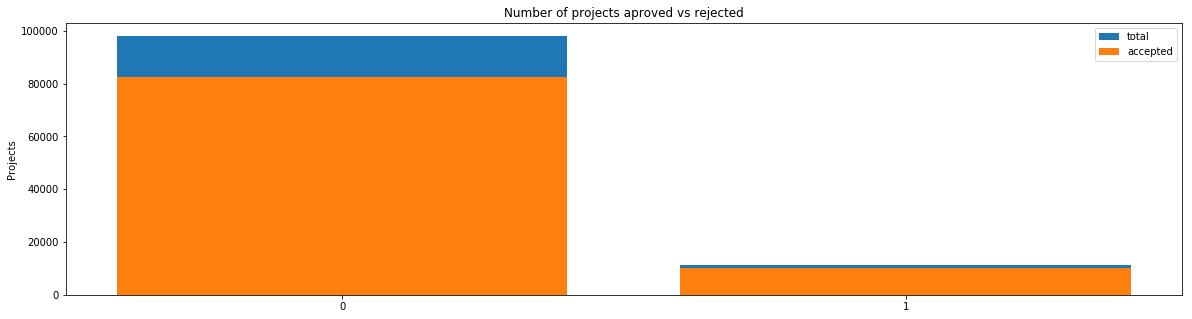

   numeric_values  project_is_approved  total       Avg
0               0                82563  98012  0.842376
1               1                10143  11236  0.902723
   numeric_values  project_is_approved  total       Avg
0               0                82563  98012  0.842376
1               1                10143  11236  0.902723


In [83]:
univariate_barplots(project_data, 'numeric_values', 'project_is_approved')

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [84]:
project_data.head(2)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2       ...        \
0  \"The limits of your language are the limits o...       ...         
1  The projector we need for our school is very c...       ...         

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            0                    0   
1                                            7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price  quantity  \
0  My students are English learners that are work...  154.6        23   
1  Our students arrive to our school eager to lea...  299.0         1   

   numeric_values  
0               0  
1               0  

[2 rows x 21 columns]

In [85]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [86]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [87]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [88]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [89]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [90]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [91]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:10<00:00, 837.05it/s]


In [92]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [93]:
# similarly you can preprocess the titles also

In [94]:
project_data['project_title'].value_counts()

Flexible Seating                                                         234
Wiggle While You Work                                                     93
Can You Hear Me Now?                                                      91
Wiggle While We Work                                                      83
Wiggle While You Work!                                                    72
Wiggle While We Work!                                                     71
We Like to Move It, Move It!                                              66
Listen Up!                                                                54
Let's Get Moving!                                                         47
Full STEAM Ahead!                                                         45
Technology in the Classroom                                               41
Wobble While You Work                                                     36
Classroom Supplies                                                        36

In [95]:
project_data['project_title'].values[2000]

'Steady Stools for Active Learning'

In [96]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [97]:
sent = decontracted(project_data['project_title'].values[2000])
print(sent)
print("="*50)

Steady Stools for Active Learning


In [98]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Steady Stools for Active Learning


In [99]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Steady Stools for Active Learning


In [100]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [101]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:06<00:00, 16935.78it/s]


In [102]:
preprocessed_titles[2000]

'steady stools active learning'

## 1. 4 Preparing data for models

In [103]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'numeric_values'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [104]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [105]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [106]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also

# Feature encoding with school_state

In [107]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'numeric_values'],
      dtype='object')

In [108]:
project_data['school_state'].value_counts()

CA    15388
TX     7396
NY     7318
FL     6185
NC     5091
IL     4350
GA     3963
SC     3936
MI     3161
PA     3109
IN     2620
MO     2576
OH     2467
LA     2394
MA     2389
WA     2334
OK     2276
NJ     2237
AZ     2147
VA     2045
WI     1827
AL     1762
UT     1731
TN     1688
CT     1663
MD     1514
NV     1367
MS     1323
KY     1304
OR     1242
MN     1208
CO     1111
AR     1049
ID      693
IA      666
KS      634
NM      557
DC      516
HI      507
ME      505
WV      503
NH      348
AK      345
DE      343
NE      309
SD      300
RI      285
MT      245
ND      143
WY       98
VT       80
Name: school_state, dtype: int64

In [109]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [110]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
state_one_hot = vectorizer.fit_transform(project_data['school_state'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (109248, 51)


# Feature encoding with teacher_prefix

In [111]:
project_data['teacher_prefix'].value_counts()
#df_new = df[df['ColumnName'].notnull()]

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [112]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
df_new = project_data[project_data['teacher_prefix'].notnull()]
df_new['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [113]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['teacher_prefix'].values.astype('str'):  #https://stackoverflow.com/questions/39116088/typeerror-in-countvectorizer-scikit-learn-expected-string-or-buffer
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [114]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
prefix_one_hot = vectorizer.fit_transform(project_data['teacher_prefix'].values.astype('str'))    ##https://stackoverflow.com/questions/39116088/typeerror-in-countvectorizer-scikit-learn-expected-string-or-buffer
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",prefix_one_hot.shape)

['nan', 'Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (109248, 6)


# Feature encoding with Project_grade

In [115]:
project_data['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

In [116]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [117]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
grade_one_hot = vectorizer.fit_transform(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",grade_one_hot.shape)

['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of matrix after one hot encodig  (109248, 5)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [118]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [119]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

In [120]:
# Similarly you can vectorize for title also
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow_ = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


#### 1.4.2.3 TFIDF vectorizer

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [122]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf_ = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",text_tfidf_.shape)

Shape of matrix after one hot encodig  (109248, 3222)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [123]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [124]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open(r'C:\Users\ASUS\Downloads\Applied AI\Assignments - Applied AI\Assignment 3 -Apply K-NN DonorsChoose_2018\glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [125]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:03<00:00, 1712.71it/s]


109248
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [126]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
avrg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avrg_w2v_vectors.append(vector)

print(len(avrg_w2v_vectors))
print(len(avrg_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:04<00:00, 23370.05it/s]


109248
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [127]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [128]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [08:00<00:00, 227.30it/s]


109248
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [129]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2vec_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2vec_vectors.append(vector)

print(len(tfidf_w2vec_vectors))
print(len(tfidf_w2vec_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:08<00:00, 12943.21it/s]


109248
300


### 1.4.3 Vectorizing Numerical features

In [130]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [131]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

# Vectorizing Numerical features - Number of previously posted projects

In [132]:
project_data['teacher_number_of_previously_posted_projects'].value_counts()

0      30014
1      16058
2      10350
3       7110
4       5266
5       4171
6       3404
7       2691
8       2293
9       1959
10      1644
11      1446
12      1335
13      1184
14       988
15       942
16       894
17       803
18       772
19       710
20       661
21       584
22       548
23       536
25       509
24       449
26       445
27       394
29       370
28       352
       ...  
219        1
333        1
282        1
281        1
270        1
406        1
341        1
404        1
335        1
339        1
338        1
293        1
394        1
294        1
362        1
326        1
365        1
428        1
364        1
236        1
274        1
234        1
266        1
425        1
361        1
296        1
329        1
359        1
422        1
235        1
Name: teacher_number_of_previously_posted_projects, Length: 374, dtype: int64

In [133]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'numeric_values'],
      dtype='object')

In [134]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

teacher_number_of_previously_posted_projects_scalar = StandardScaler()
teacher_number_of_previously_posted_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 11.153165275336848, Standard deviation : 27.77702641477403


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [135]:
teacher_number_of_previously_posted_projects_standardized

array([[-0.40152481],
       [-0.14951799],
       [-0.36552384],
       ...,
       [-0.29352189],
       [-0.40152481],
       [-0.40152481]])

### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [136]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [137]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<ol> 
    <li> In the above cells we have plotted and analyzed many features. Please observe the plots and write the observations in markdown cells below every plot.</li>
    <li> EDA: Please complete the analysis of the feature: teacher_number_of_previously_posted_projects</li>
    <li>
        <ul>Build the data matrix using these features 
            <li>school_state : categorical data (one hot encoding)</li>
            <li>clean_categories : categorical data (one hot encoding)</li>
            <li>clean_subcategories : categorical data (one hot encoding)</li>
            <li>teacher_prefix : categorical data (one hot encoding)</li>
            <li>project_grade_category : categorical data (one hot encoding)</li>
            <li>project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
            <li>price : numerical</li>
            <li>teacher_number_of_previously_posted_projects : numerical</li>
         </ul>
    </li>
    <li> Now, plot FOUR t-SNE plots with each of these feature sets.
        <ol>
            <li>categorical, numerical features + project_title(BOW)</li>
            <li>categorical, numerical features + project_title(TFIDF)</li>
            <li>categorical, numerical features + project_title(AVG W2V)</li>
            <li>categorical, numerical features + project_title(TFIDF W2V)</li>
        </ol>
    </li>
    <li> Concatenate all the features and Apply TNSE on the final data matrix </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points to avoid memory issues. If you run into memory error issues, reduce the number of data points but clearly state the number of datat-poins you are using</font></li>
</ol>

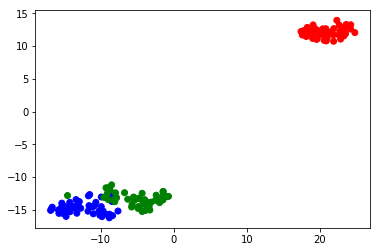

In [138]:
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris['data']
y = iris['target']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [139]:
# please write all of the code with proper documentation and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [147]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_Bow = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, prefix_one_hot, grade_one_hot, price_standardized, teacher_number_of_previously_posted_projects_standardized, text_bow_))
print(X_Bow.shape)
xbow= X_Bow.tocsr()

(109248, 3325)


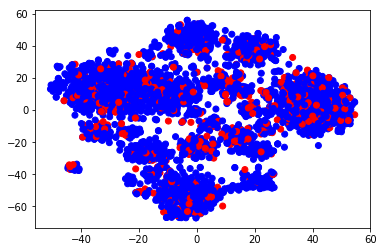

In [144]:
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt


x = xbow[0:4000]
y = project_data['project_is_approved'][0:4000]

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((X_embedding.T, y)).T
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [149]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tfidf = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, prefix_one_hot, grade_one_hot, price_standardized, teacher_number_of_previously_posted_projects_standardized, text_tfidf_))
print(X_tfidf.shape)
xtfidf=X_tfidf.tocsr()

(109248, 3325)


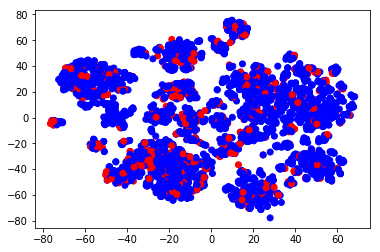

In [150]:
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt


x = xtfidf[0:4000]
y = project_data['project_is_approved'][0:4000]

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((X_embedding.T, y)).T
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [151]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_avg_w2v = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, prefix_one_hot, grade_one_hot, price_standardized, teacher_number_of_previously_posted_projects_standardized, avrg_w2v_vectors))
print(X_avg_w2v.shape)
x_avgw2v=X_avg_w2v.tocsr()

(109248, 403)


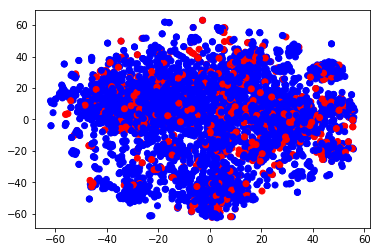

In [152]:
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt


x = x_avgw2v[0:4000]
y = project_data['project_is_approved'][0:4000]

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((X_embedding.T, y)).T
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [154]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tfidf_w2v = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, prefix_one_hot, grade_one_hot, price_standardized, teacher_number_of_previously_posted_projects_standardized, tfidf_w2vec_vectors))
print(X_tfidf_w2v.shape)
xtfidf_w2v=X_tfidf_w2v.tocsr()

(109248, 403)


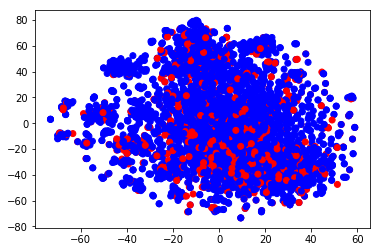

In [156]:
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt


x = xtfidf_w2v[0:4000]
y = project_data['project_is_approved'][0:4000]

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((X_embedding.T, y)).T
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

<h2> 2.5 Summary </h2>

In [0]:
# Write few sentences about the results that you obtained and the observations you made.

In [157]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_concat_txt = hstack((categories_one_hot, sub_categories_one_hot, state_one_hot, prefix_one_hot, grade_one_hot, price_standardized, teacher_number_of_previously_posted_projects_standardized, tfidf_w2vec_vectors, avrg_w2v_vectors, text_tfidf_, text_bow_))
print(X_concat_txt.shape)
xconcat_txt=X_concat_txt.tocsr()

(109248, 7147)


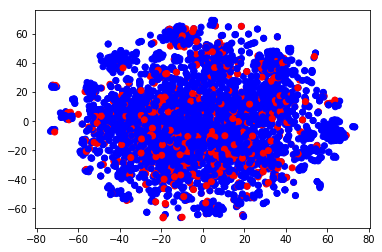

In [158]:
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt


x = xconcat_txt[0:4000]
y = project_data['project_is_approved'][0:4000]

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((X_embedding.T, y)).T
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()